# Preliminary Results

In [1056]:
# Import Libraries
from msc_code.scripts.notebook_setup import *

# Define import path and import case and paper data
import_path = "/".join([RAW_DATA_DIR, "data_extraction"])
case_data = pd.read_excel('/'.join([import_path, 'case_report_data_extraction_preliminary.xlsx'])) # Import case data
paper_data = pd.read_excel('/'.join([import_path, 'data_extraction_preliminary_end.xlsx'])) # Import paper data

# Define report path for export
report_path = "/".join([OUTPUT_DIR, "reports", "preliminary_data_extraction_report"])
stats_file = "/".join([report_path, "stats.tex"])
tables_path = "/".join([report_path, "tables"])
figures_path = "/".join([report_path, "figures"])

# Filter paper data to only include results where data extraction completed
paper_data = paper_data[paper_data['Data_Extracted'] == 'Y']

### Clean Data

### Case Data

### Cleaning

In [1057]:
case_data['Study_ID'] = case_data['Study_ID'].astype('int')

In [ ]:
# Patient_ID
case_data['Patient_ID'] = case_data['Patient_ID'].astype('str')
# Check Patient_ID is unique
print(f"All Patient_ID's are unique?: {case_data['Patient_ID'].is_unique}")

# Create dataframe of duplicate patient Ids
duplicates = case_data[case_data['Patient_ID'].duplicated(keep=False)]
print(duplicates)

All Patient_ID's are unique?: True
Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Sharp, Object_Multiple, Object_Other, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Other, Comments]
Index: []

[0 rows x 31 columns]


In [1059]:
# Calculate number of cases per paper
case_counts = case_data.groupby('Study_ID')['Patient_ID'].count()

# Map to paper_data, creating 'Case_Count' column
paper_data['Case_Count'] = paper_data['Study_ID'].map(case_counts)

In [1060]:
# Create list of papers where case data is missing.
missing_case_data = paper_data[pd.isna(paper_data['Case_Count'])]

# Print
print(missing_case_data.index)
len(missing_case_data)

Index([], dtype='int64')


0

## Paper Data

### Study Design

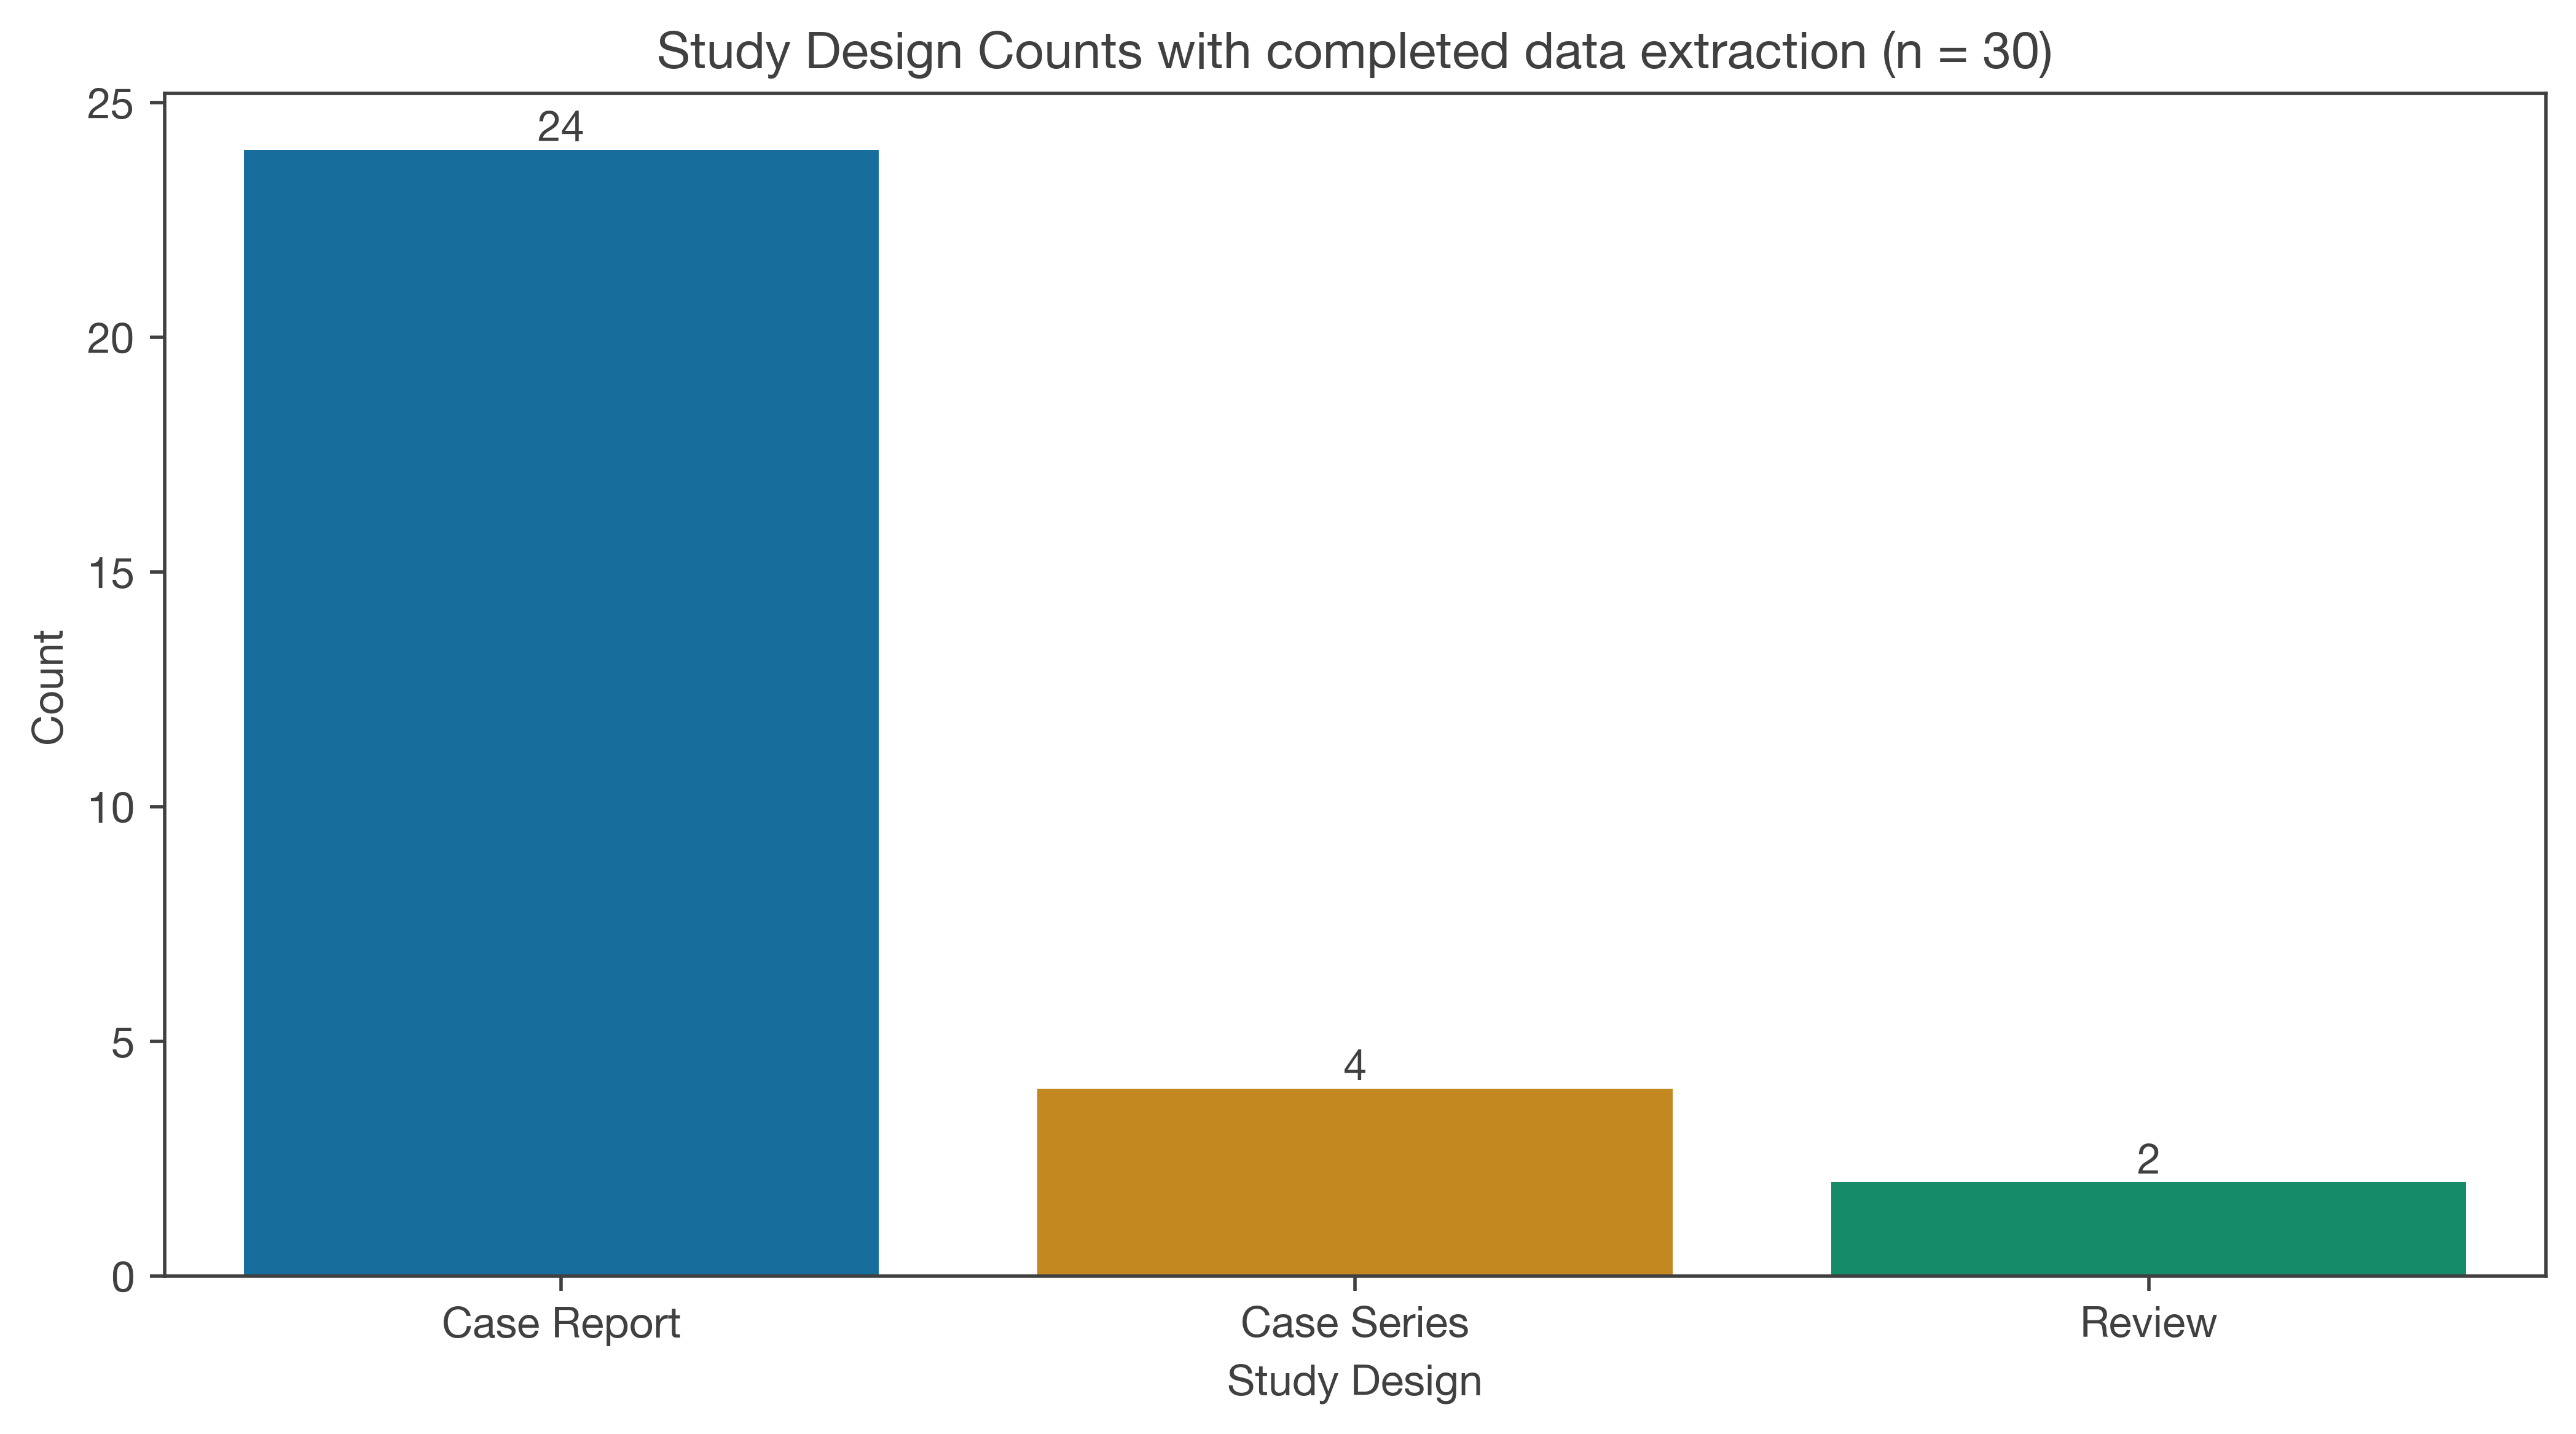

In [1061]:
plot_data = paper_data['Study_Design'].value_counts().reset_index()
plot_data.columns = ['Study Design', 'Count']

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=plot_data, x='Study Design', y='Count', palette='colorblind')

# Set title and labels
ax.set(title=f'Study Design Counts with completed data extraction (n = {len(paper_data)})', xlabel='Study Design', ylabel='Count')

# Add labels to the top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plot_path = "/".join([figures_path, "study_design_plot.pdf"])
plt.savefig(plot_path)
plt.show()
plt.close()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


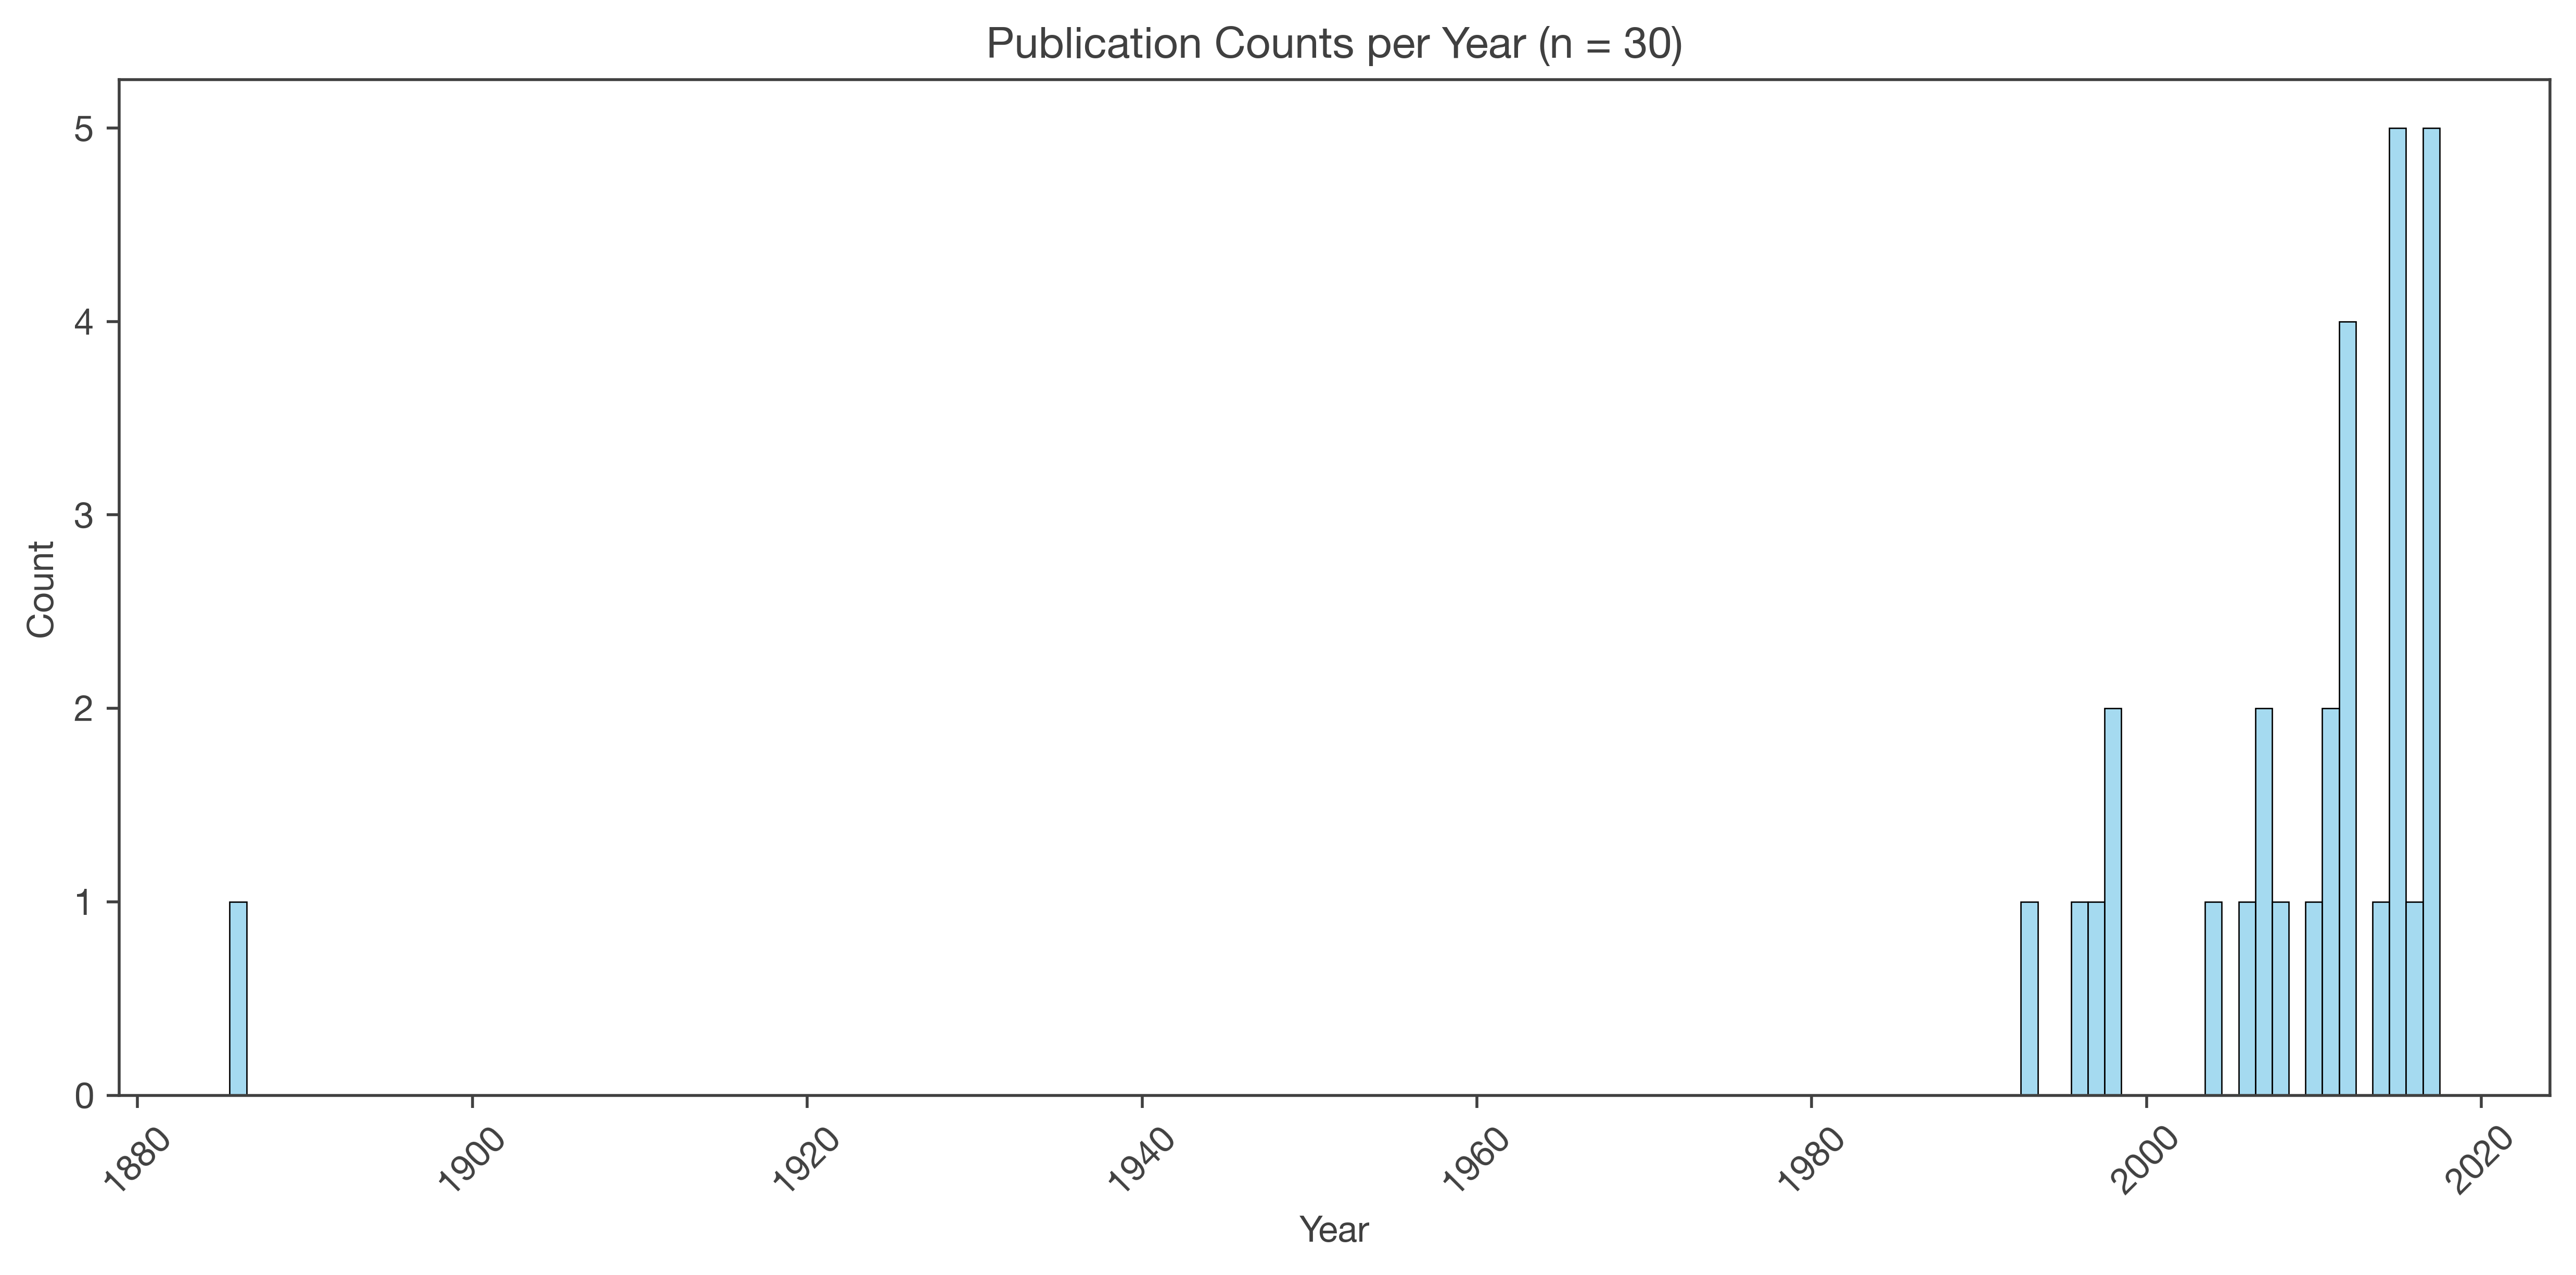

In [1062]:
plot_data = paper_data.copy()
plot_data.head()

# Plot histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    data=plot_data,
    x='Publication_Year',
    bins='auto',  # Let Seaborn automatically determine the bins
    color='skyblue',
    discrete=True
)

# Set y-axis ticks to increment by 1
y_max = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, int(y_max) + 1, 1))

# Titles and labels
ax.set(title=f'Publication Counts per Year (n = {len(paper_data)})')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-ticks if needed for readability
plt.tight_layout()
plot_path = "/".join([figures_path, "historic_publications_per_year_plot.pdf"])
plt.savefig(plot_path)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 5000x2500 with 0 Axes>

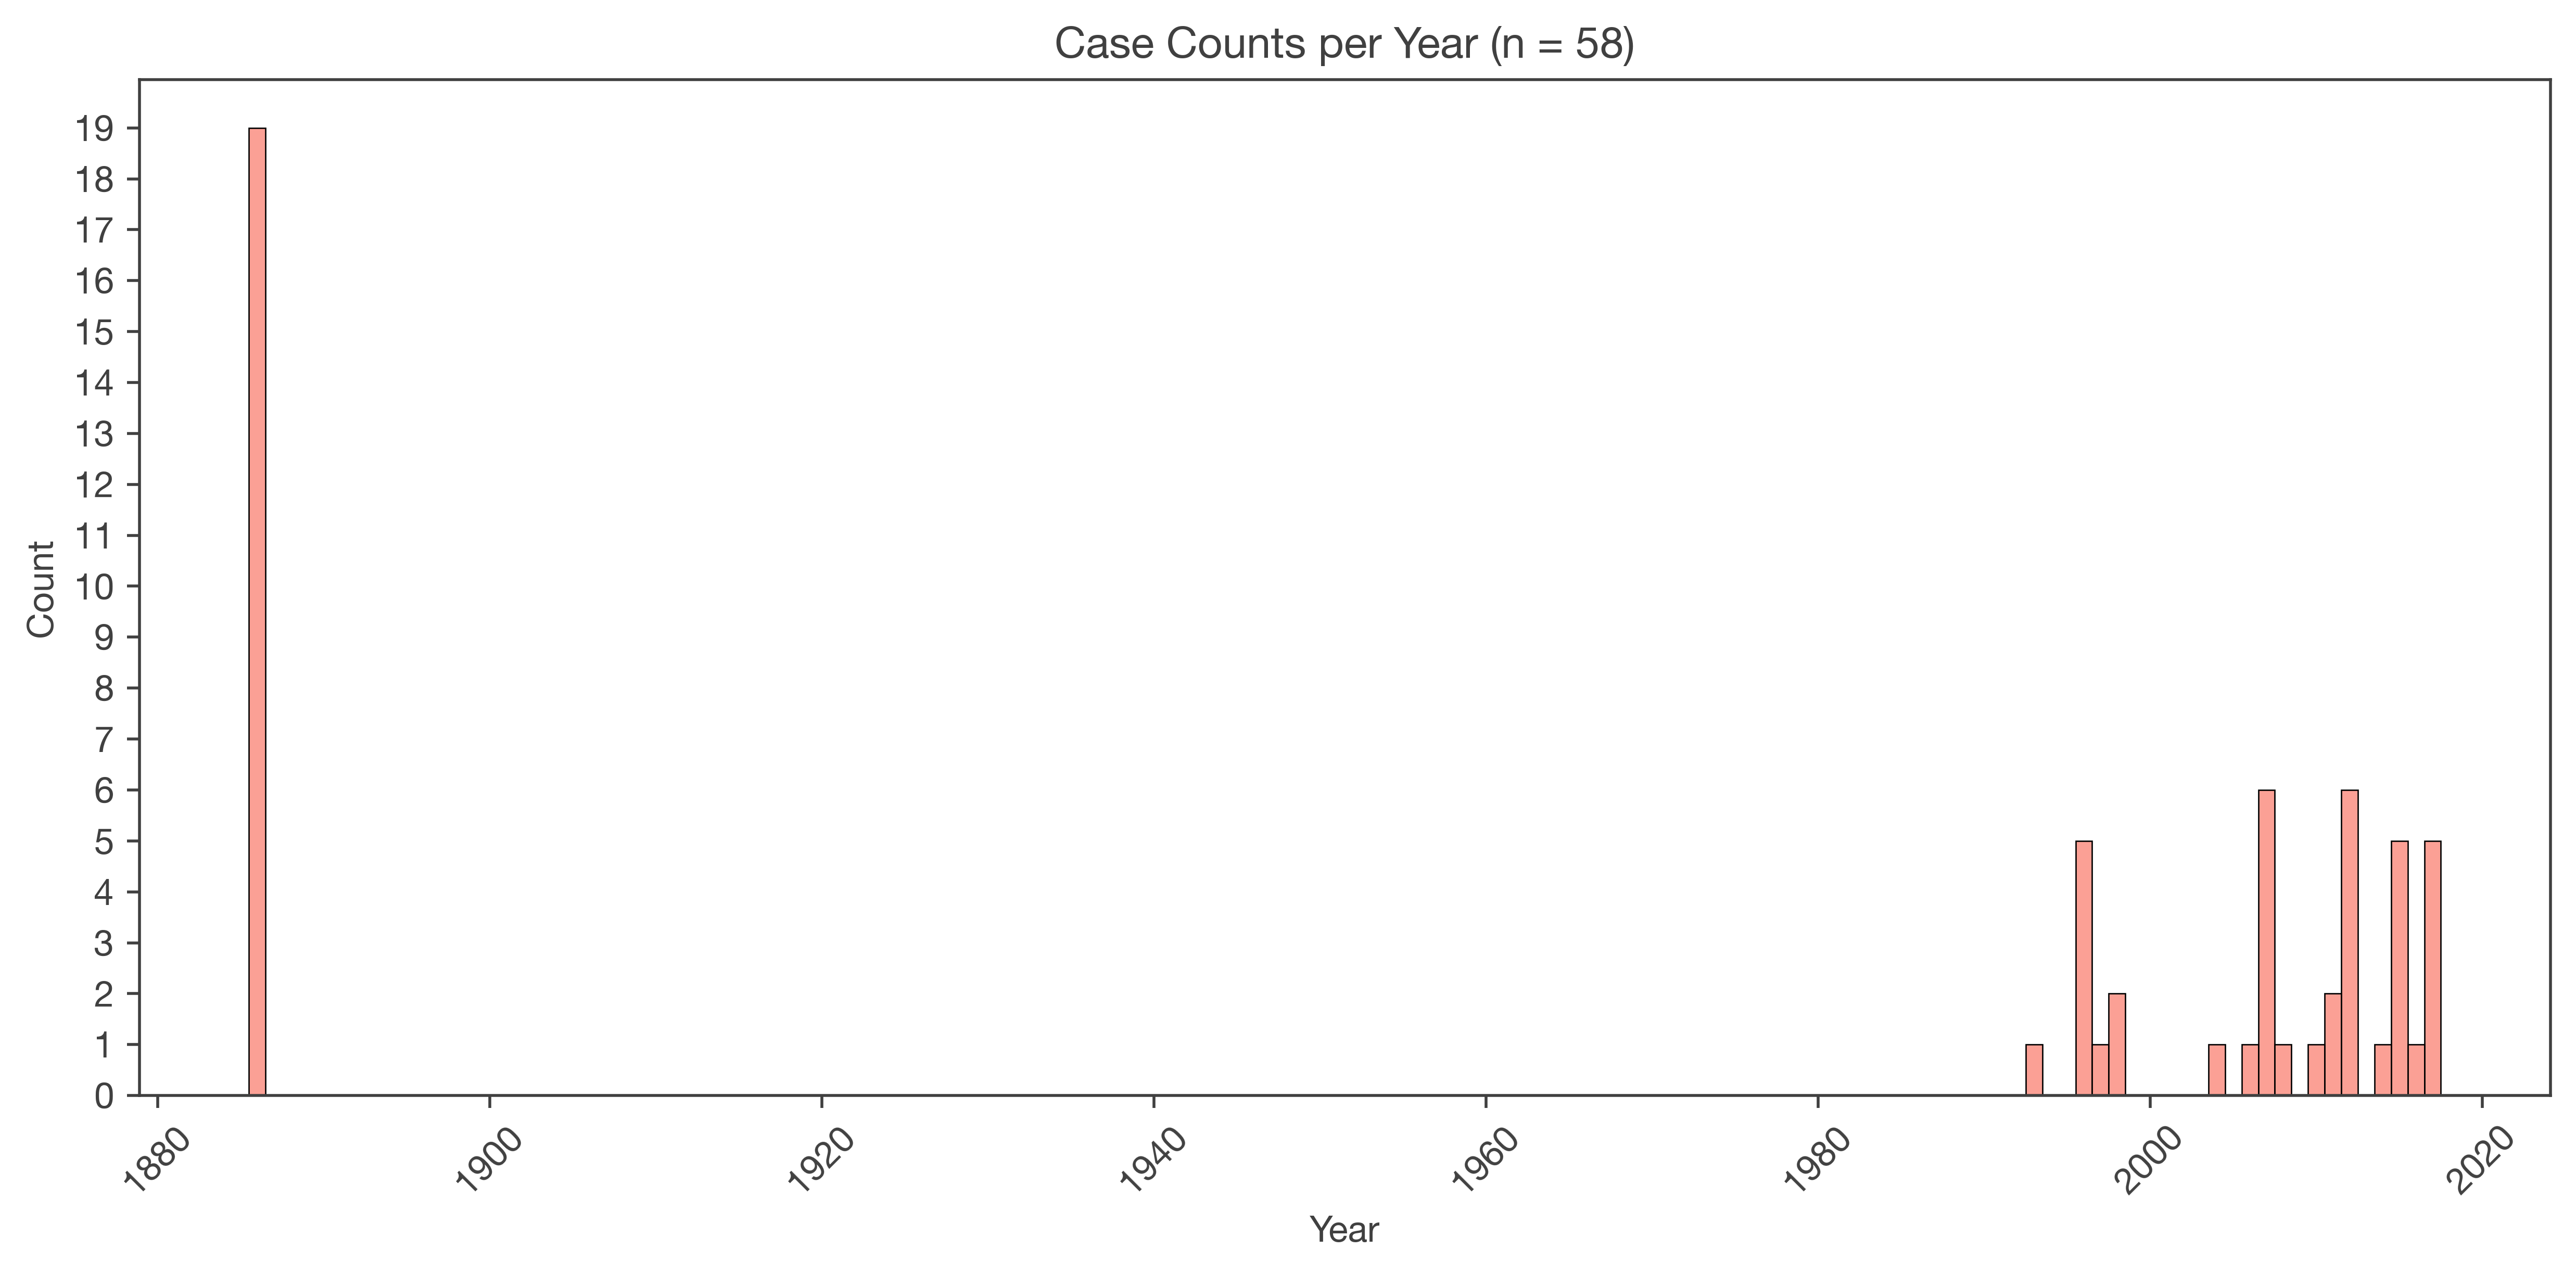

In [1063]:
# Filter only extracted papers
plot_data = paper_data.copy()

# Plot histogram
plt.figure(figsize=(10, 5))

# Plot histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    data=plot_data,
    x='Publication_Year',
    weights='Case_Count',
    bins='auto',  # Let Seaborn automatically determine the bins
    color='salmon',
    discrete=True
)

# Set y-axis ticks to increment by 1
y_max = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, int(y_max) + 1, 1))

# Titles and labels
ax.set(title=f'Case Counts per Year (n = {len(case_data)})')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-ticks if needed for readability
plt.tight_layout()
plot_path = "/".join([figures_path, "historic_cases_per_year_plot.pdf"])
plt.savefig(plot_path)
plt.show()


In [1064]:
case_data = case_data[case_data['Study_ID'] != 3]
paper_data = paper_data[paper_data['Study_ID'] != 3]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


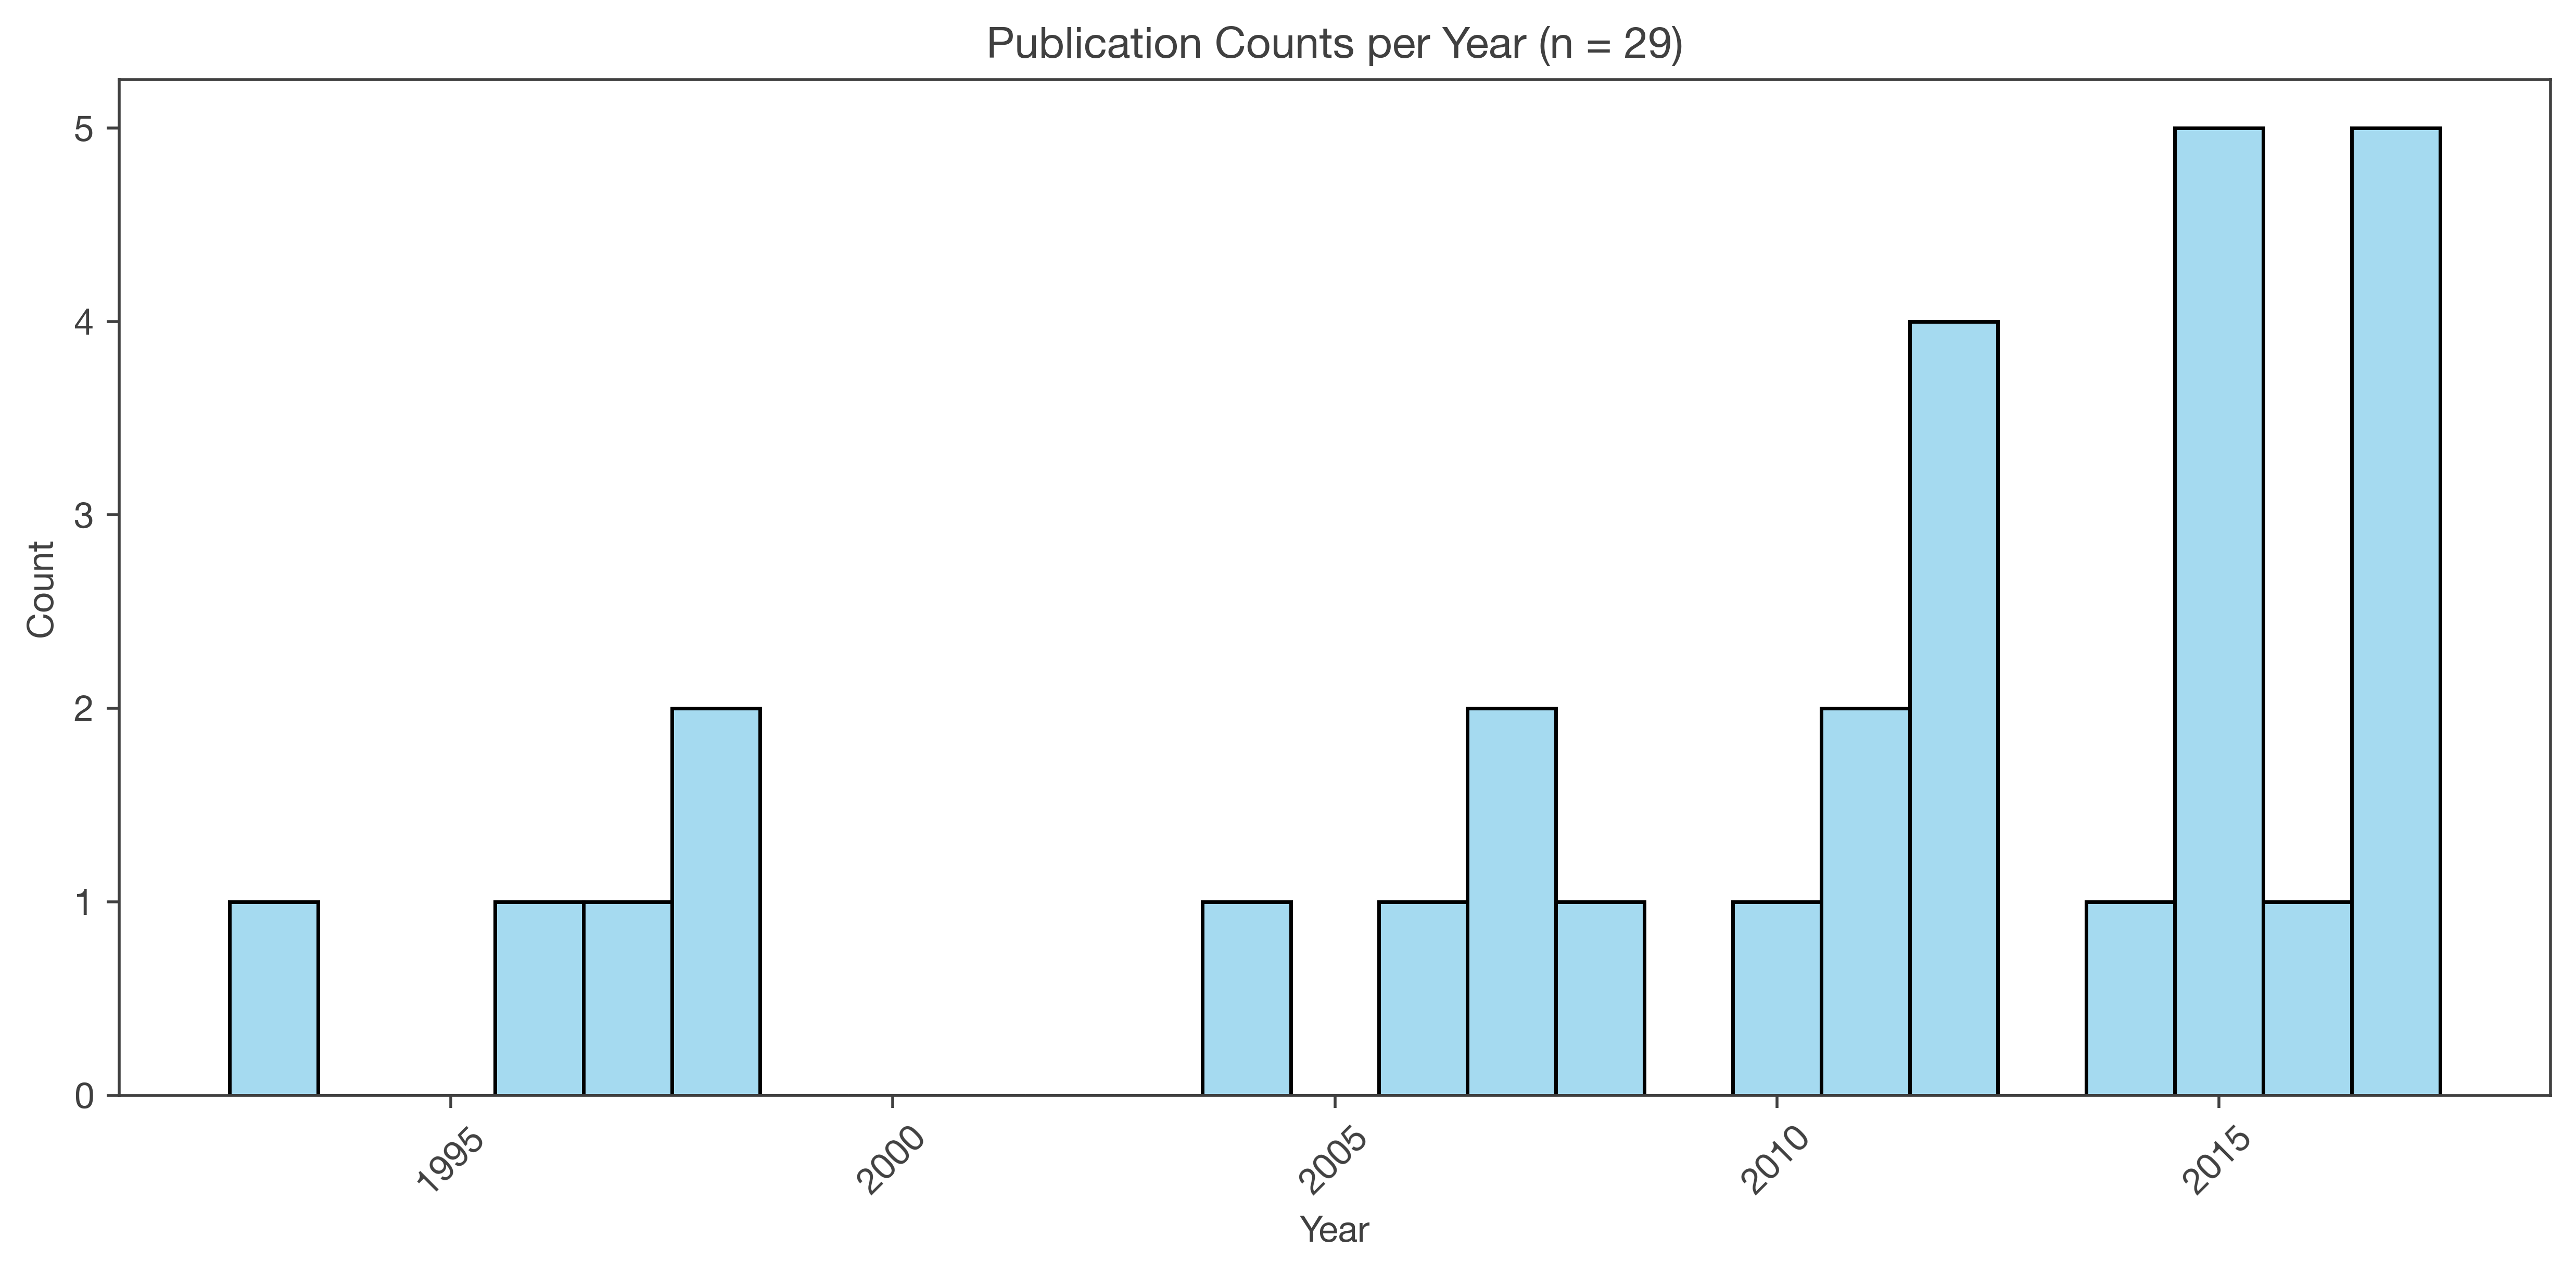

In [1065]:
plot_data = paper_data.copy()
plot_data.head()

# Plot histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    data=plot_data,
    x='Publication_Year',
    bins='auto',  # Let Seaborn automatically determine the bins
    color='skyblue',
    discrete=True
)

# Set y-axis ticks to increment by 1
y_max = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, int(y_max) + 1, 1))

# Titles and labels
ax.set(title=f'Publication Counts per Year (n = {len(paper_data)})')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-ticks if needed for readability
plt.tight_layout()
plot_path = "/".join([figures_path, "publications_per_year_plot.pdf"])
plt.savefig(plot_path)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 5000x2500 with 0 Axes>

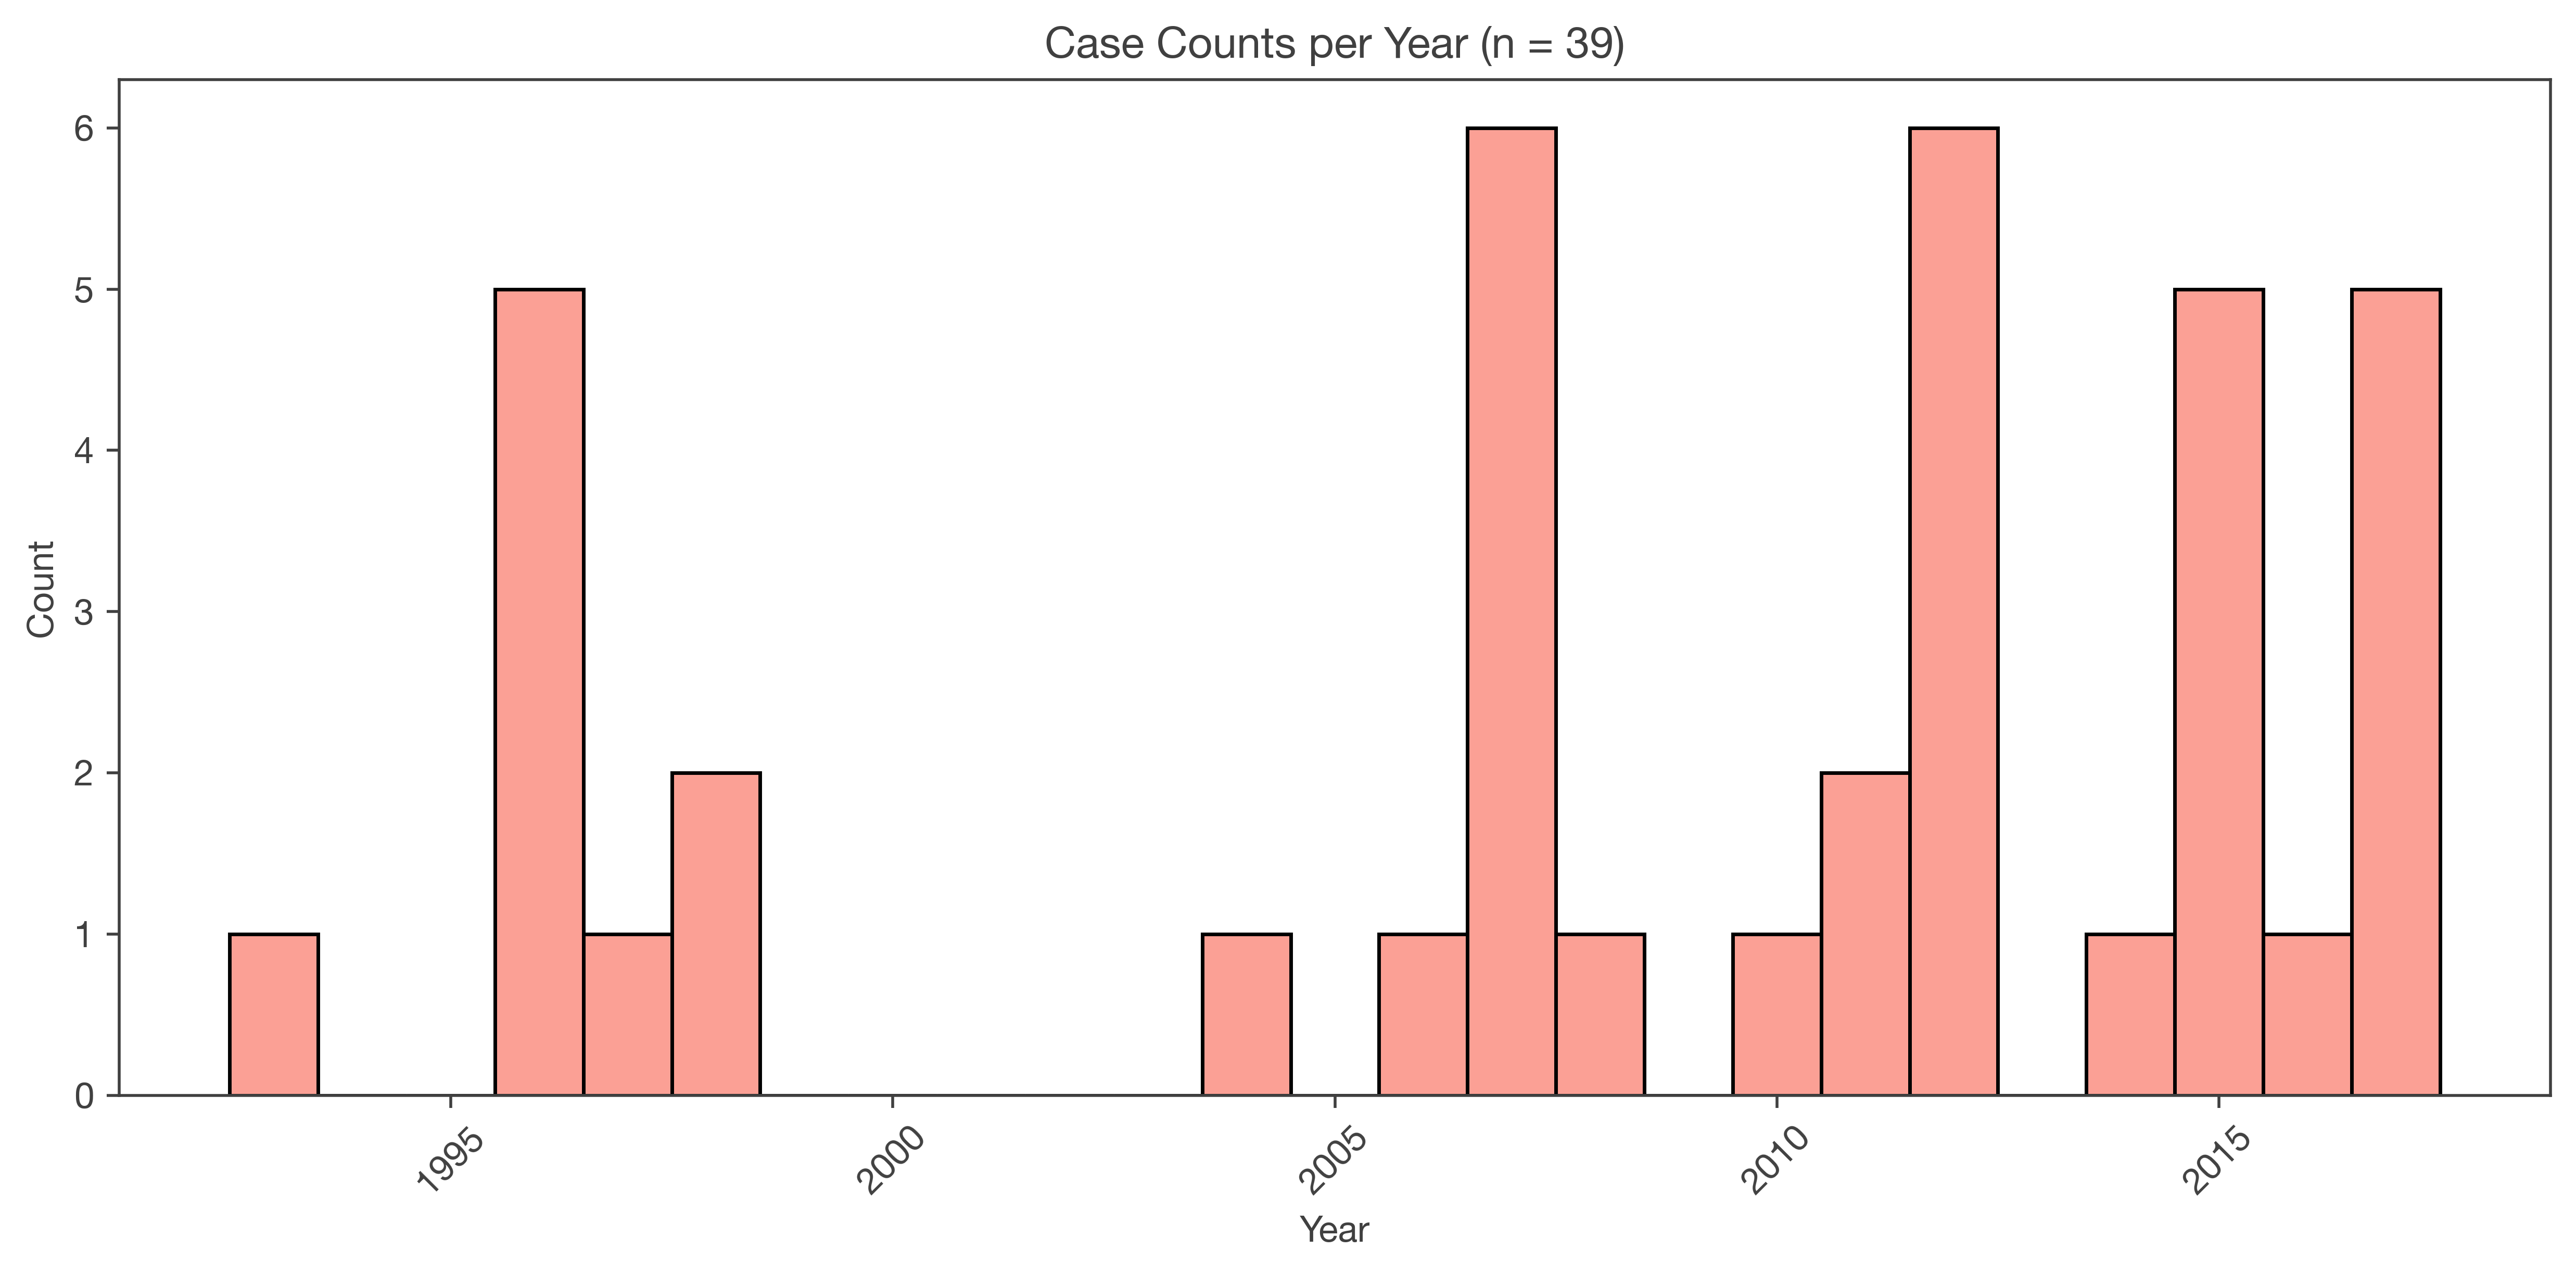

In [1066]:
# Filter only extracted papers
plot_data = paper_data.copy()

# Plot histogram
plt.figure(figsize=(10, 5))

# Plot histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    data=plot_data,
    x='Publication_Year',
    weights='Case_Count',
    bins='auto',  # Let Seaborn automatically determine the bins
    color='salmon',
    discrete=True
)

# Set y-axis ticks to increment by 1
y_max = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, int(y_max) + 1, 1))

# Titles and labels
ax.set(title=f'Case Counts per Year (n = {len(case_data)})')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-ticks if needed for readability
plt.tight_layout()
plot_path = "/".join([figures_path, "cases_per_year_plot.pdf"])
plt.savefig(plot_path)
plt.show()


### Age and Gender

In [1067]:
# Replace 'UK' (or other non-numeric entries) with NaN
case_data['Age_Yrs'] = pd.to_numeric(case_data['Age_Yrs'], errors='coerce')

# Now safely convert to int (optional: after dropping NaNs or imputing)
case_age_data = case_data['Age_Yrs'].dropna().astype(int)

# Summary statistics
age_summary = case_age_data.describe()

# Convert to DataFrame for formatting
age_summary_df = age_summary.reset_index()

age_summary_df = age_summary_df.astype(str).replace('%', r'\%', regex=True)

age_summary_df.columns = ['Statistic', 'Value']

age_summary_table_path = "/".join([tables_path, "age_summary_table.tex"])

# Convert to LaTeX table
age_summary_table = age_summary_df.to_latex(age_summary_table_path,
                                      index=False)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


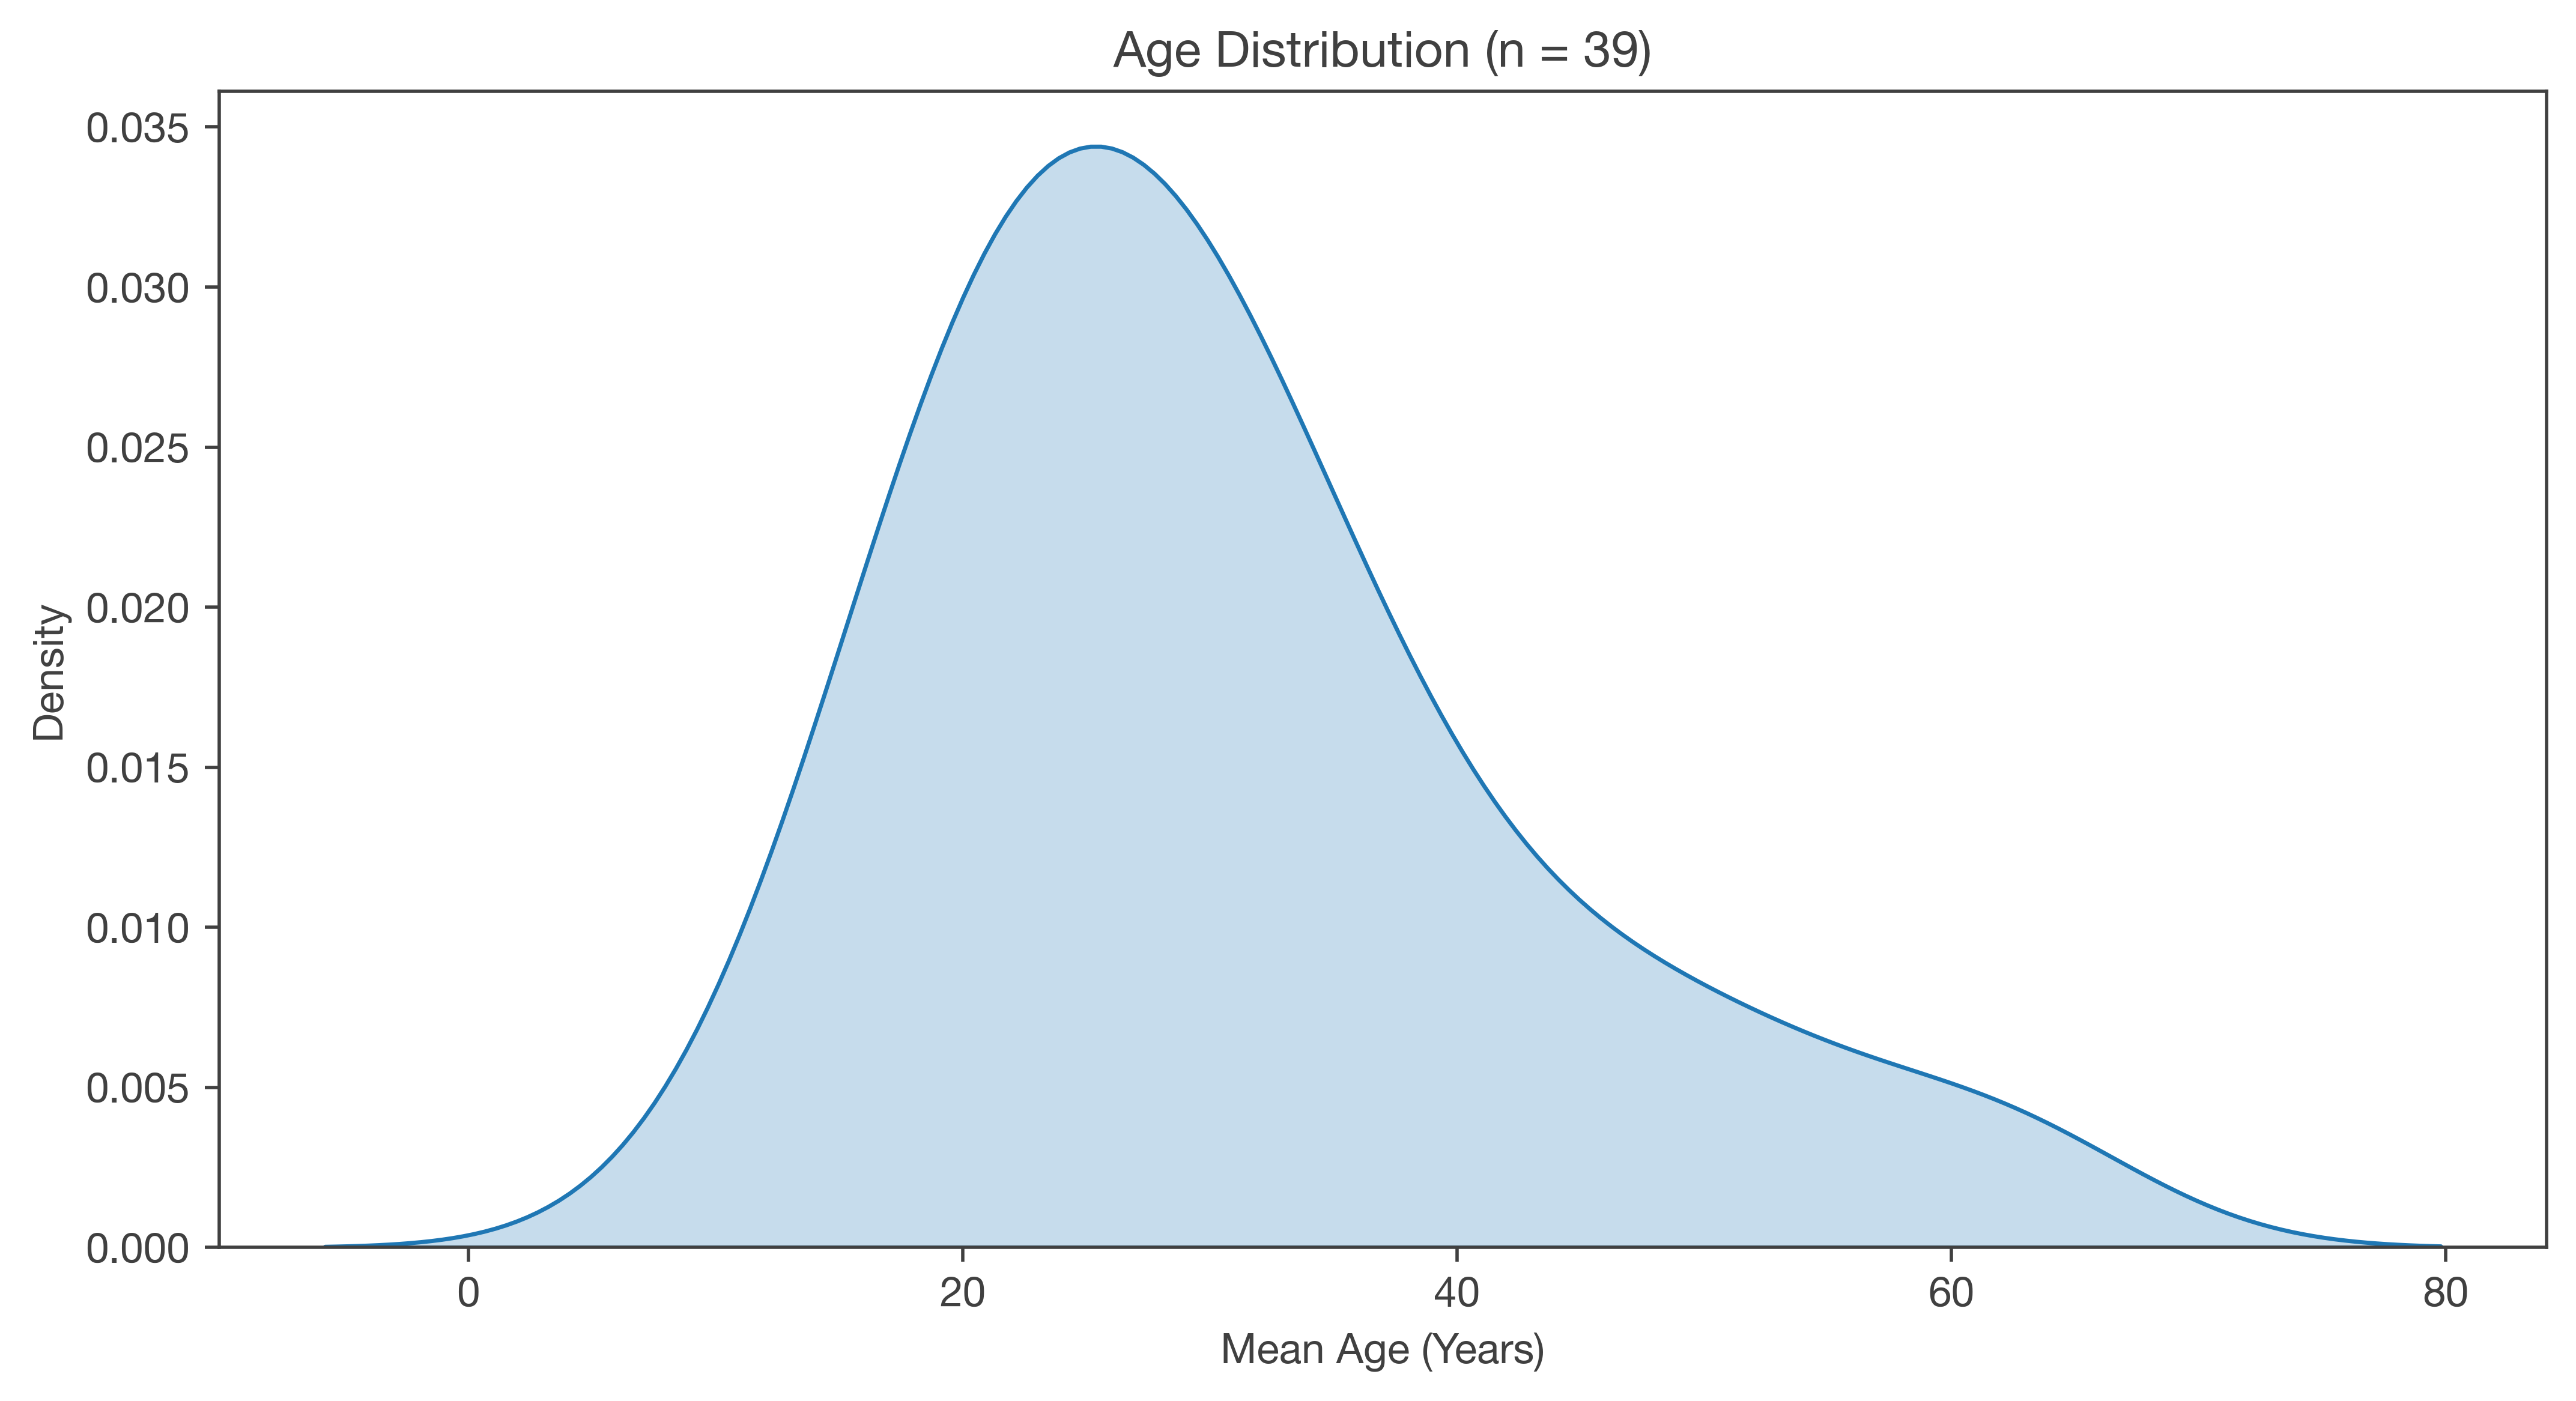

In [1068]:
plot_data = case_data['Age_Yrs']
age_kde_path = "/".join([figures_path, "age_kde_plot.pdf"])

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data=plot_data, fill=True)
ax.set(title=f'Age Distribution (n = {len(case_data)})', xlabel='Mean Age (Years)')
plt.savefig(age_kde_path)
plt.show()
plt.close()

In [1069]:
# Replace 'UK' values with 'Unknown' to aid clarity
case_data['Gender'] = case_data['Gender'].replace('UK', 'Unknown')

# Create case_gender_data dataframe
case_gender_data = case_data['Gender'].value_counts().reset_index()

# Rename columns
case_gender_data.columns = ['Gender', 'Count']

# Calulate percentage gender in new column
case_gender_data['Percentage'] = case_gender_data['Count'] / case_gender_data['Count'].sum() * 100

# Round Percentages to two decimal places
case_gender_data['Percentage'] = case_gender_data['Percentage'].round(2)

# Create case_gender_table
case_gender_table = case_gender_data.copy()

# Define case_gender_table path
export_path = "/".join([tables_path, "case_gender_table.tex"])

case_gender_data.to_latex(export_path,
                          index=False)

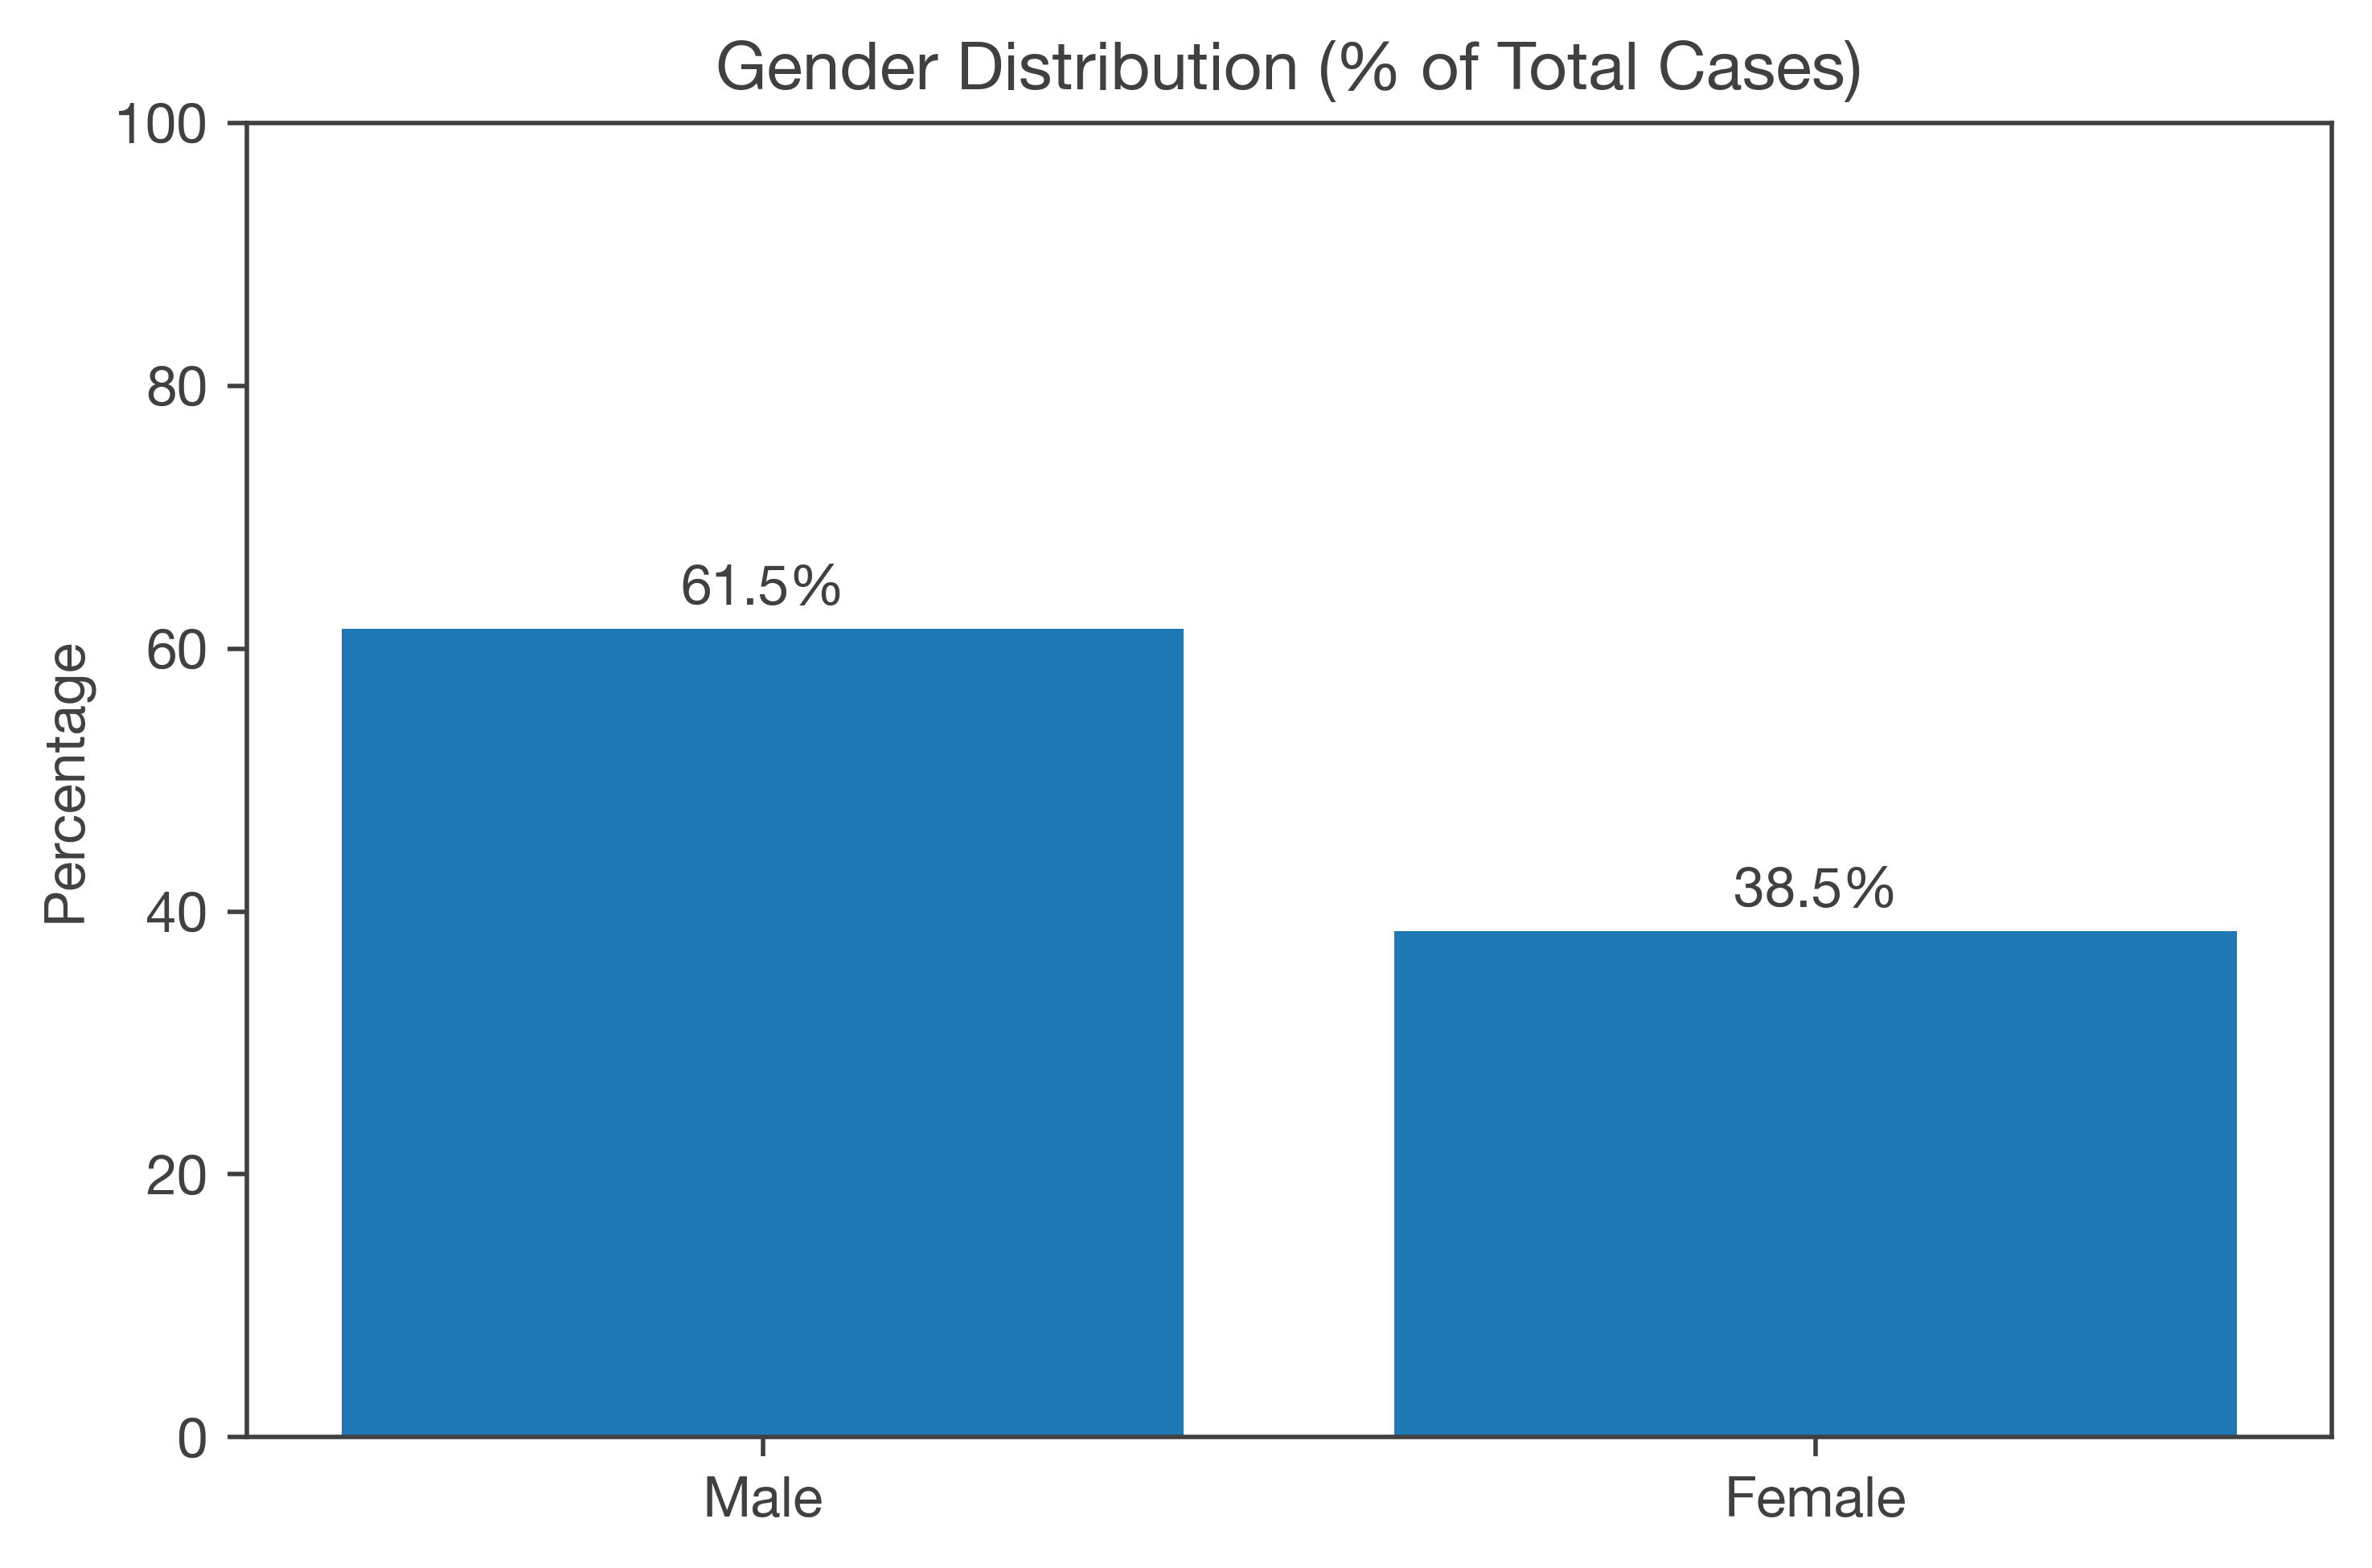

In [1070]:
# Clean and prep gender column (just in case)
case_data['Gender'] = case_data['Gender'].replace('UK', 'Unknown')
case_data['Gender'] = case_data['Gender'].str.strip()

# Get percentage distribution
gender_percent = case_data['Gender'].value_counts(normalize=True) * 100
gender_percent = gender_percent.round(1)

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_percent.index.str.title(), gender_percent.values)

# Add percentage labels on bars
for bar, pct in zip(bars, gender_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{pct:.1f}%", ha='center', va='bottom')

plt.title("Gender Distribution (% of Total Cases)")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.tight_layout()
export_path = "/".join([figures_path, "gender_distribution_plot.pdf"])
plt.savefig(export_path)
plt.show()

## Aggregate Data

In [1071]:
def calculate_rate_by_study(
    input_df,
    output_df,
    condition,
    study_col='Study_ID',
    id_col='Patient_ID',
    prefix='Outcome'
):
    """
    Calculates rate of a condition per study and merges it into output_df.
    
    Parameters:
        input_df (DataFrame): Raw case-level data.
        output_df (DataFrame): Paper-level data (e.g. one row per study).
        condition (Series[bool]): Boolean mask to filter input_df.
        study_col (str): Column in both dataframes that identifies the study.
        id_col (str): Column to count as individual cases.
        prefix (str): Prefix for naming output columns (e.g. 'Endoscopy' or '%_Is_Prisoner').

    Returns:
        DataFrame: Modified output_df with total cases, condition counts, and rate.
    """
    input_df = input_df.copy()
    input_df[study_col] = input_df[study_col].astype(str)
    output_df = output_df.copy()
    output_df[study_col] = output_df[study_col].astype(str)
    
    # Total cases per study
    total_counts = input_df.groupby(study_col)[id_col].count()
    
    # Cases matching the condition
    matching_counts = input_df[condition].groupby(study_col)[id_col].count()
    
    # Combine into summary DataFrame
    summary = pd.DataFrame({
        'Total_Cases': total_counts,
        f'{prefix}_Cases': matching_counts
    }).fillna(0)
    
    # Calculate rate
    summary[f'{prefix}_Rate'] = summary[f'{prefix}_Cases'] / summary['Total_Cases']
    
    # Merge into output_df
    output_df = output_df.drop(columns=['Total_Cases'], errors='ignore')
    output_df = output_df.merge(summary, on=study_col, how='left')
    
    # Fill in missing values
    output_df[['Total_Cases', f'{prefix}_Cases', f'{prefix}_Rate']] = output_df[[
        'Total_Cases', f'{prefix}_Cases', f'{prefix}_Rate'
    ]].fillna(0)
    
    return output_df

In [1072]:
def calculate_category_rates_by_study(
    input_df,
    output_df,
    category_col,
    categories,
    study_col='Study_ID',
    id_col='Patient_ID',
    prefix='Gender'
):
    """
    Calculates rate of each category value per study and merges them into output_df.

    Parameters:
        input_df (DataFrame): Raw case-level data.
        output_df (DataFrame): Paper-level data (one row per study).
        category_col (str): Column containing the category (e.g. 'Gender').
        categories (dict): Dictionary mapping raw values to desired column suffixes.
                           E.g., {'Male': 'Male', 'Female': 'Female', 'UK': 'Unknown'}
        study_col (str): Column name that identifies the study (default 'Study_ID').
        id_col (str): Column name that identifies unique patients (default 'Patient_ID').
        prefix (str): Prefix for the output column names.

    Returns:
        DataFrame: Updated output_df with category rates per study.
    """
    input_df = input_df.copy()
    output_df = output_df.copy()
    
    input_df[study_col] = input_df[study_col].astype(str)
    output_df[study_col] = output_df[study_col].astype(str)

    # Total cases per study
    total_counts = input_df.groupby(study_col)[id_col].count()

    # Start the summary DataFrame with total counts
    summary = pd.DataFrame({'Total_Cases': total_counts})

    # Loop through each category
    for raw_value, label in categories.items():
        cat_counts = input_df[input_df[category_col] == raw_value].groupby(study_col)[id_col].count()
        summary[f'{prefix}_{label}_Cases'] = cat_counts
        summary[f'{prefix}_{label}_Rate'] = (cat_counts / summary['Total_Cases'])

    # Fill any missing values with 0
    summary = summary.fillna(0)

    # Merge into output_df
    output_df = output_df.drop(columns=['Total_Cases'], errors='ignore')
    output_df = output_df.merge(summary, on=study_col, how='left')
    
    # Fill missing values (e.g., studies with no cases)
    cols_to_fill = ['Total_Cases'] + [f'{prefix}_{label}_{suffix}' for label in categories.values() for suffix in ['Cases', 'Rate']]
    output_df[cols_to_fill] = output_df[cols_to_fill].fillna(0)

    return output_df

In [1073]:
def calculate_age_summary_by_study(
    input_df,
    output_df,
    age_col='Age',
    study_col='Study_ID',
    id_col='Patient_ID',
    prefix='Age_Yrs'
):
    """
    Calculates summary stats (min, max, mean, median) for age per study and merges into output_df.

    Parameters:
        input_df (DataFrame): Case-level data.
        output_df (DataFrame): Paper-level data (1 row per study).
        age_col (str): Name of the column containing age data.
        study_col (str): Study identifier column (shared across both dataframes).
        id_col (str): Patient ID column, used only for grouping safety.
        prefix (str): Prefix for new column names.

    Returns:
        DataFrame: Updated output_df with Age_Low, Age_High, Age_Mean, Age_Median
    """
    input_df = input_df.copy()
    output_df = output_df.copy()

    input_df[study_col] = input_df[study_col].astype(str)
    output_df[study_col] = output_df[study_col].astype(str)

    # Ensure Age is numeric
    input_df[age_col] = pd.to_numeric(input_df[age_col], errors='coerce')

    # Group and calculate summary stats
    age_summary = input_df.groupby(study_col)[age_col].agg(
        Age_Low='min',
        Age_High='max',
        Age_Mean='mean',
        Age_Median='median'
    ).reset_index()

    # Merge into paper_data
    output_df = output_df.merge(age_summary, on=study_col, how='left')

    return output_df

In [1074]:
def calculate_category_rates_by_study(
    input_df,
    output_df,
    category_col,
    categories,
    study_col='Study_ID',
    id_col='Patient_ID',
    prefix='Gender'
):
    """
    Calculates rate of each category value per study and merges them into output_df.

    Parameters:
        input_df (DataFrame): Raw case-level data.
        output_df (DataFrame): Paper-level data (one row per study).
        category_col (str): Column containing the category (e.g. 'Gender').
        categories (dict): Dictionary mapping raw values to desired column suffixes.
                           E.g., {'Male': 'Male', 'Female': 'Female', 'UK': 'Unknown'}
        study_col (str): Column name that identifies the study (default 'Study_ID').
        id_col (str): Column name that identifies unique patients (default 'Patient_ID').
        prefix (str): Prefix for the output column names.

    Returns:
        DataFrame: Updated output_df with category rates per study.
    """
    input_df = input_df.copy()
    output_df = output_df.copy()
    
    input_df[study_col] = input_df[study_col].astype(str)
    output_df[study_col] = output_df[study_col].astype(str)

    # Total cases per study
    total_counts = input_df.groupby(study_col)[id_col].count()

    # Start the summary DataFrame with total counts
    summary = pd.DataFrame({'Total_Cases': total_counts})

    # Loop through each category
    for raw_value, label in categories.items():
        cat_counts = input_df[input_df[category_col] == raw_value].groupby(study_col)[id_col].count()
        summary[f'{prefix}_{label}_Cases'] = cat_counts
        summary[f'{prefix}_{label}_Rate'] = (cat_counts / summary['Total_Cases'])

    # Fill any missing values with 0
    summary = summary.fillna(0)

    # Merge into output_df
    output_df = output_df.drop(columns=['Total_Cases'], errors='ignore')
    output_df = output_df.merge(summary, on=study_col, how='left')
    
    # Fill missing values (e.g., studies with no cases)
    cols_to_fill = ['Total_Cases'] + [f'{prefix}_{label}_{suffix}' for label in categories.values() for suffix in ['Cases', 'Rate']]
    output_df[cols_to_fill] = output_df[cols_to_fill].fillna(0)

    return output_df

### Population Characteristics

In [1075]:
# Calculate age summary for each study
paper_data = calculate_age_summary_by_study(
    input_df=case_data,
    output_df=paper_data,
    age_col='Age_Yrs'
)

gender_map = {
    'Male': 'Male',
    'Female': 'Female',
    'UK': 'Unknown'
}

# Calculate gender category rates
paper_data = calculate_category_rates_by_study(
    input_df=case_data,
    output_df=paper_data,
    category_col='Gender',
    categories=gender_map,
    prefix='Gender'
)

# Is_Prisoner Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Is_Prisoner'] == 'Y'),
    prefix='Is_Prisoner'
)

# Psych_Hx Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Psych_Hx'] == 'Y'),
    prefix='Psych_Hx'
)

# Psych_Inpat Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Is_Psych_Inpat'] == 'Y'),
    prefix='Is_Psych_Inpat'
)

# Previous Ingestion Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Previous_Ingestions'] == 'Y'),
    prefix='Previous_Ingestions'
)

# Previous Ingestion Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Is_Displaced_Person'] == 'Y'),
    prefix='Is_Displaced_Person'
)

### Motivation

In [1076]:
# Motivation_Intent_To_Harm
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Motivation_Intent_To_Harm'] == 'Y'),
    prefix='Motivation_Intent_To_Harm'
)

# Motivation_Protest Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Motivation_Protest'] == 'Y'),
    prefix='Motivation_Protest'
)

# Motivation_Unknown Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Motivation_Unknown'] == 'Y'),
    prefix='Motivation_Unknown'
)


### Object Data

In [1077]:
# Object Button Battery Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Object_Button_Battery'] == 'Y'),
    prefix='Object_Button_Battery'
)

# Object Long
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Object_Long'] == 'Y'),
    prefix='Object_Long'
)

# Object Sharp
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Object_Sharp'] == 'Y'),
    prefix='Object_Sharp'
)

# Complications
long_sharp_cols = ['Object_Long',	'Object_Sharp']

# Check if any of those columns are 'Y' per row
case_data['Object_Long_Sharp'] = case_data[long_sharp_cols].eq('Y').all(axis=1).map({True: 'Y', False: 'N'})

# Object Long Sharp
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Object_Long_Sharp'] == 'Y'),
    prefix='Object_Long_Sharp'
)

# Object Multiple
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Object_Multiple'] == 'Y'),
    prefix='Object_Multiple'
)

### Outcomes

In [1078]:
# Endoscopy Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Outcome_Endoscopy'] == 'Y'),
    prefix='Outcome_Endoscopy'
)

# Surgery Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Outcome_Surgery'] == 'Y'),
    prefix='Outcome_Surgery'
)

# Mortality Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Outcome_Death'] == 'Y'),
    prefix='Outcome_Death'
)

# Mortality Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=((case_data['Outcome_Surgery'] == 'N') & (case_data['Outcome_Endoscopy'] == 'N')),
    prefix='Outcome_Conservative'
)

# Complications
complication_cols = ['Outcome_Injury_Needing_Intervention',	'Outcome_Perforation',	'Outcome_Obstruction']

# Check if any of those columns are 'Y' per row
case_data['Outcome_Complication'] = case_data[complication_cols].eq('Y').any(axis=1).map({True: 'Y', False: 'N'})

# Complication Rate
paper_data = calculate_rate_by_study(
    input_df=case_data,
    output_df=paper_data,
    condition=(case_data['Outcome_Complication'] == 'Y'),
    prefix='Outcome_Complication'
)


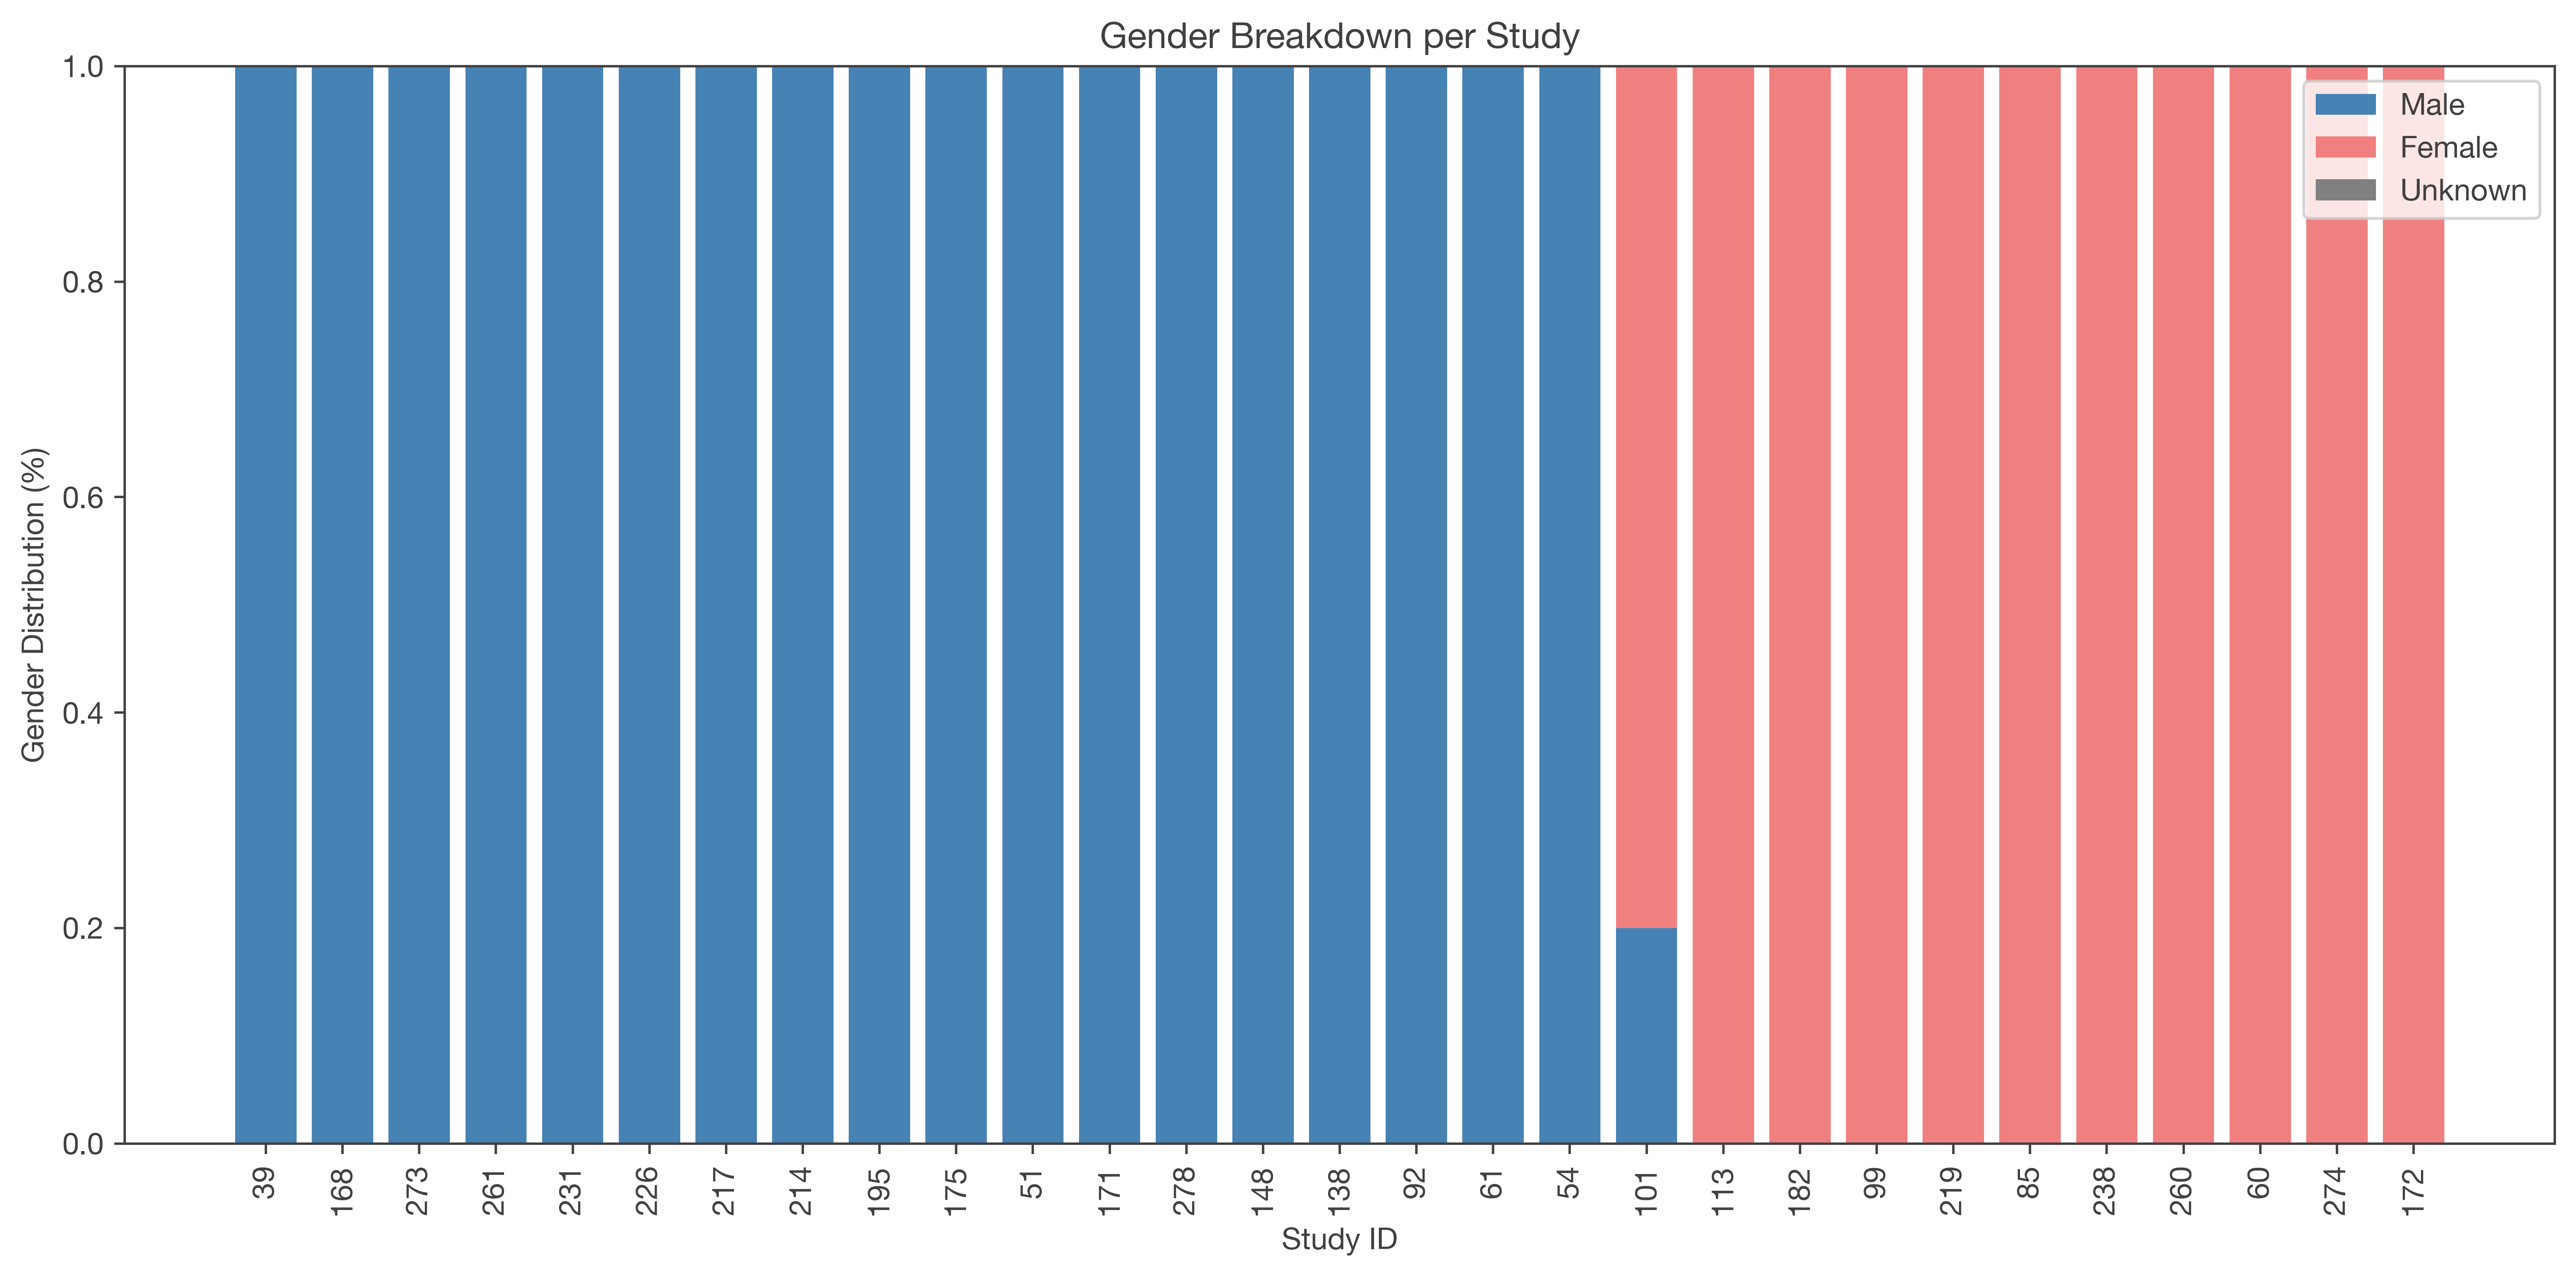

In [1079]:
gender_plot_path = "/".join([figures_path, "gender_plot.pdf"])
sorted_df = paper_data.sort_values('Gender_Male_Rate', ascending=False)

# Plot stacked bar
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Study_ID'], sorted_df['Gender_Male_Rate'], label='Male', color='steelblue')
plt.bar(sorted_df['Study_ID'], sorted_df['Gender_Female_Rate'], 
        bottom=sorted_df['Gender_Male_Rate'], label='Female', color='lightcoral')
plt.bar(sorted_df['Study_ID'], sorted_df['Gender_Unknown_Rate'], 
        bottom=sorted_df['Gender_Male_Rate'] + sorted_df['Gender_Female_Rate'], label='Unknown', color='gray')

plt.xticks(rotation=90)
plt.xlabel('Study ID')
plt.ylabel('Gender Distribution (%)')
plt.title('Gender Breakdown per Study')
plt.legend()
plt.tight_layout()
plt.savefig(gender_plot_path)
plt.show()

### Population Characteristics

In [1080]:
# Define population columns
population_cols = ['Is_Prisoner',	'Is_Psych_Inpat',	'Is_Displaced_Person',	'Under_Influence_Alcohol',	'Psych_Hx',	'Severe_Disability_Hx',	'Previous_Ingestions']

# Create an empty summary dictionary
summary = {}

# Loop through each outcome column
for col in population_cols:
    total = case_data[col].notna().sum()  # Total valid (non-missing) entries
    count = (case_data[col] == 'Y').sum()  # Count of 'Y'
    percent = (count / total * 100) if total > 0 else 0

    summary[col] = {
        'Count_Y': count,
        'Total_Recorded': total,
        'Percentage_Y': round(percent, 1)
    }

# Convert to DataFrame
population_summary = pd.DataFrame(summary).T.reset_index().rename(columns={'index': 'Characteristic'})

# Sort ascending
population_summary = population_summary.sort_values(by='Percentage_Y', ascending=False).reset_index(drop=True)

# Rename characteristics
label_map = {
    'Is_Prisoner': 'Prisoner',
    'Is_Psych_Inpat': 'Psychiatric Inpatient',
    'Is_Displaced_Person': 'Displaced Person',
    'Psych_Hx': 'Psychiatric History',
    'Previous_Ingestions': 'Previous Ingestion',
    'Severe_Disability_Hx': 'Hx Severe Disability',
    'Under_Influence_Alcohol': 'Under Influence of Alcohol'
}

population_summary['Characteristic'] = population_summary['Characteristic'].replace(label_map)

population_summary = population_summary.rename(columns={
    'Characteristic': 'Characteristic',
    'Count_Y': 'Count',
    'Total_Recorded': 'Total Recorded',
    'Percentage_Y': 'Percentage'
})

# Define path to save table
population_summary_table_path = "/".join([tables_path, "population_summary_table.tex"])

# Export as LaTeX
population_summary.to_latex(
    population_summary_table_path,
    index=False,
    float_format="%.1f"
)

population_summary

,Characteristic,Count,Total Recorded,Percentage
0,Psychiatric History,21.0,39.0,53.8
1,Prisoner,12.0,39.0,30.8
2,Previous Ingestion,11.0,39.0,28.2
3,Psychiatric Inpatient,4.0,39.0,10.3
4,Hx Severe Disability,3.0,39.0,7.7
5,Displaced Person,2.0,39.0,5.1
6,Under Influence of Alcohol,1.0,39.0,2.6


In [1081]:
# Create Object_Long_Sharp column
case_data['Outcome_Endoscopy_Surgery'] = case_data.apply(
    lambda row: 'Y' if row['Outcome_Endoscopy'] == 'Y' and row['Outcome_Surgery'] == 'Y' 
    else ('N' if pd.notna(row['Outcome_Endoscopy']) and pd.notna(row['Outcome_Surgery']) else np.nan),
    axis=1
)

case_data['Outcome_Conservative'] = case_data.apply(
    lambda row: 'Y' if row['Outcome_Endoscopy'] != 'Y' and row['Outcome_Surgery'] != 'Y' 
    else 'N',
    axis=1
)

In [1082]:
# Define outcome columns
outcome_cols = ['Outcome_Endoscopy',
                'Outcome_Surgery',
                'Outcome_Endoscopy_Surgery',
                'Outcome_Conservative',
                'Outcome_Death',	
                'Outcome_Injury_Needing_Intervention',	
                'Outcome_Perforation',	
                'Outcome_Obstruction',	
                'Outcome_Other']

# Create an empty summary dictionary
summary = {}

# Loop through each outcome column
for col in outcome_cols:
    total = case_data[col].notna().sum()  # Total valid (non-missing) entries
    count = (case_data[col] == 'Y').sum()  # Count of 'Y'
    percent = (count / total * 100) if total > 0 else 0

    summary[col] = {
        'Count_Y': count,
        'Total_Recorded': total,
        'Percentage_Y': round(percent, 1)
    }

# Convert to DataFrame
outcome_summary = pd.DataFrame(summary).T.reset_index().rename(columns={'index': 'Outcome'})

# Tidy Outcome Column text
outcome_summary['Outcome'] = outcome_summary['Outcome'].str.replace("_", " ").str.replace("Outcome", "").str.strip()

# Rename columns
outcome_summary = outcome_summary.rename(columns={
    "Count_Y": "Count Y",
    "Total_Recorded": "Total Recorded",
    "Percentage_Y": "Percentage Y"
})

# Sort descending
outcome_summary = outcome_summary.sort_values(by='Percentage Y', ascending=False).reset_index(drop=True)

# Export to LaTeX
outcome_summary_path = "/".join([tables_path, "outcome_summary_table.tex"])
outcome_summary.to_latex(
    outcome_summary_path,
    index=False,
    float_format="%.1f"
)

# Show summary
outcome_summary

,Outcome,Count Y,Total Recorded,Percentage Y
0,Surgery,23.0,39.0,59.0
1,Injury Needing Intervention,20.0,39.0,51.3
2,Endoscopy,15.0,38.0,39.5
3,Perforation,12.0,39.0,30.8
4,Other,10.0,39.0,25.6
5,Conservative,6.0,39.0,15.4
6,Endoscopy Surgery,5.0,38.0,13.2
7,Obstruction,4.0,39.0,10.3
8,Death,1.0,39.0,2.6


In [1083]:
# Create Object_Long_Sharp column
case_data['Object_Long_Sharp'] = case_data.apply(
    lambda row: 'Y' if row['Object_Long'] == 'Y' and row['Object_Sharp'] == 'Y' 
    else ('N' if pd.notna(row['Object_Long']) and pd.notna(row['Object_Sharp']) else np.nan),
    axis=1
)

# Create Object_Short_Sharp column
case_data['Object_Short_Sharp'] = case_data.apply(
    lambda row: 'Y' if row['Object_Long'] == 'N' and row['Object_Sharp'] == 'Y' 
    else ('N' if pd.notna(row['Object_Long']) and pd.notna(row['Object_Sharp']) else np.nan),
    axis=1
)

In [1084]:
# Define object columns
object_cols = ['Object_Button_Battery',	
               'Object_Magnet', 
               'Object_Long', 
               'Object_Sharp',
               'Object_Long_Sharp',
               'Object_Short_Sharp',	
               'Object_Multiple']

# Create an empty summary dictionary
summary = {}

# Loop through each outcome column
for col in object_cols:
    total = case_data[col].notna().sum()  # Total valid (non-missing) entries
    count = (case_data[col] == 'Y').sum()  # Count of 'Y'
    percent = (count / total * 100) if total > 0 else 0

    summary[col] = {
        'Count_Y': count,
        'Total_Recorded': total,
        'Percentage_Y': round(percent, 1)
    }

# Convert to DataFrame
object_summary = pd.DataFrame(summary).T.reset_index().rename(columns={'index': 'Object_Type'})

# Sort by percentage prevelance descending
object_summary = object_summary.sort_values(by='Percentage_Y', ascending=False).reset_index(drop=True)

# Rename columns
object_summary = object_summary.rename(columns={
    "Object_Type": "Object Type",
    "Count_Y": "Count Y",
    "Total_Recorded": "Total Recorded",
    "Percentage_Y": "Percentage Y"
})

object_summary["Object Type"] = object_summary['Object Type'].str.replace("_", " ").str.replace("Object", "").str.strip()

object_summary_table_path = "/".join([tables_path, "object_summary_table.tex"])
object_summary.to_latex(
    object_summary_table_path,
    index=False,
    float_format="%.1f"
)

object_summary

,Object Type,Count Y,Total Recorded,Percentage Y
0,Multiple,22.0,39.0,56.4
1,Sharp,16.0,39.0,41.0
2,Short Sharp,12.0,39.0,30.8
3,Long,11.0,39.0,28.2
4,Magnet,3.0,39.0,7.7
5,Long Sharp,3.0,39.0,7.7
6,Button Battery,0.0,39.0,0.0


In [1085]:
# Create Motivation_Other_Psych_Hx column
case_data['Motivation_Other_Psych_Hx'] = case_data.apply(
    lambda row: 'Y' if row['Psych_Hx'] == 'Y' and row['Motivation_Other'] == 'Y' 
    else ('N' if pd.notna(row['Psych_Hx']) and pd.notna(row['Motivation_Other']) else np.nan),
    axis=1
)

# Create Motivation_Other_No_Psych_Hx column
case_data['Motivation_Other_No_Psych_Hx'] = case_data.apply(
    lambda row: 'Y' if row['Psych_Hx'] == 'N' and row['Motivation_Other'] == 'Y' 
    else ('N' if pd.notna(row['Psych_Hx']) and pd.notna(row['Motivation_Other']) else np.nan),
    axis=1
)

# Create Motivation_Other_Is_Prisoner column
case_data['Motivation_Other_Is_Prisoner'] = case_data.apply(
    lambda row: 'Y' if row['Psych_Hx'] == 'Y' and row['Is_Prisoner'] == 'Y' 
    else ('N' if pd.notna(row['Psych_Hx']) and pd.notna(row['Is_Prisoner']) else np.nan),
    axis=1
)


# Create Motivation_Unknown_Psych_Hx column
case_data['Motivation_Unknown_Psych_Hx'] = case_data.apply(
    lambda row: 'Y' if row['Psych_Hx'] == 'Y' and row['Motivation_Unknown'] == 'Y' 
    else ('N' if pd.notna(row['Psych_Hx']) and pd.notna(row['Motivation_Unknown']) else np.nan),
    axis=1
)

# Create Motivation_Unknown_No_Psych_Hx column
case_data['Motivation_Unknown_No_Psych_Hx'] = case_data.apply(
    lambda row: 'Y' if row['Psych_Hx'] == 'N' and row['Motivation_Unknown'] == 'Y' 
    else ('N' if pd.notna(row['Psych_Hx']) and pd.notna(row['Motivation_Unknown']) else np.nan),
    axis=1
)


In [1086]:
# Motivation Data

# Define motivation columns
motivation_cols = ['Motivation_Intent_To_Harm',	'Motivation_Protest',	'Motivation_Psychiatric',	'Motivation_Unknown',	'Motivation_Other']

# Create an empty summary dictionary
summary = {}

# Loop through each outcome column
for col in motivation_cols:
    total = case_data[col].notna().sum()  # Total valid (non-missing) entries
    count = (case_data[col] == 'Y').sum()  # Count of 'Y'
    percent = (count / total * 100) if total > 0 else 0

    summary[col] = {
        'Count_Y': count,
        'Total_Recorded': total,
        'Percentage_Y': round(percent, 1)
    }

# Convert to DataFrame
motivation_summary = pd.DataFrame(summary).T.reset_index().rename(columns={'index': 'Motivation'})

motivation_summary = motivation_summary.sort_values(by='Percentage_Y', ascending=False).reset_index(drop=True)

motivation_summary = motivation_summary.rename(columns={
    "Count_Y": "Count Y",
    "Total_Recorded": "Total Recorded",
    "Percentage_Y": "Percentage Y"
})

motivation_summary['Motivation'] = motivation_summary['Motivation'].str.replace("_", " ").str.replace("Outcome", "").str.strip()

# Export to LaTeX
motivation_summary_table_path = "/".join([tables_path, "motivation_summary_table.tex"])
motivation_summary.to_latex(
    motivation_summary_table_path,
    index=False,
    float_format="%.1f"
)

motivation_summary

,Motivation,Count Y,Total Recorded,Percentage Y
0,Motivation Intent To Harm,19.0,39.0,48.7
1,Motivation Psychiatric,17.0,39.0,43.6
2,Motivation Other,12.0,39.0,30.8
3,Motivation Unknown,10.0,39.0,25.6
4,Motivation Protest,8.0,39.0,20.5


In [1087]:
# Motivation Data

# Define motivation columns
motivation_cols = ['Motivation_Intent_To_Harm',
                   'Motivation_Other',
                   'Motivation_Other_Psych_Hx',
                   'Motivation_Other_No_Psych_Hx', 
                   'Motivation_Protest', 
                   'Motivation_Unknown',
                   'Motivation_Unknown_Psych_Hx',
                   'Motivation_Unknown_No_Psych_Hx']

# Create an empty summary dictionary
summary = {}

# Loop through each outcome column
for col in motivation_cols:
    total = case_data[col].notna().sum()  # Total valid (non-missing) entries
    count = (case_data[col] == 'Y').sum()  # Count of 'Y'
    percent = (count / total * 100) if total > 0 else 0

    summary[col] = {
        'Count_Y': count,
        'Total_Recorded': total,
        'Percentage_Y': round(percent, 1)
    }

# Convert to DataFrame
motivation_subgroup_summary = pd.DataFrame(summary).T.reset_index().rename(columns={'index': 'Motivation'})

motivation_subgroup_summary = motivation_subgroup_summary.sort_values(by='Percentage_Y', ascending=False).reset_index(drop=True)

motivation_subgroup_summary = motivation_subgroup_summary.rename(columns={
    "Count_Y": "Count Y",
    "Total_Recorded": "Total Recorded",
    "Percentage_Y": "Percentage Y"
})

motivation_subgroup_summary['Motivation'] = motivation_subgroup_summary['Motivation'].str.replace("_", " ").str.replace("Outcome", "").str.strip()

# Export to LaTeX
motivation_subgroup_summary_table_path = "/".join([tables_path, "motivation_subgroup_summary_table.tex"])
motivation_subgroup_summary.to_latex(
    motivation_subgroup_summary_table_path,
    index=False,
    float_format="%.1f"
)

motivation_subgroup_summary

,Motivation,Count Y,Total Recorded,Percentage Y
0,Motivation Intent To Harm,19.0,39.0,48.7
1,Motivation Other,12.0,39.0,30.8
2,Motivation Unknown,10.0,39.0,25.6
3,Motivation Other No Psych Hx,8.0,39.0,20.5
4,Motivation Protest,8.0,39.0,20.5
5,Motivation Unknown Psych Hx,8.0,39.0,20.5
6,Motivation Other Psych Hx,4.0,39.0,10.3
7,Motivation Unknown No Psych Hx,1.0,39.0,2.6


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


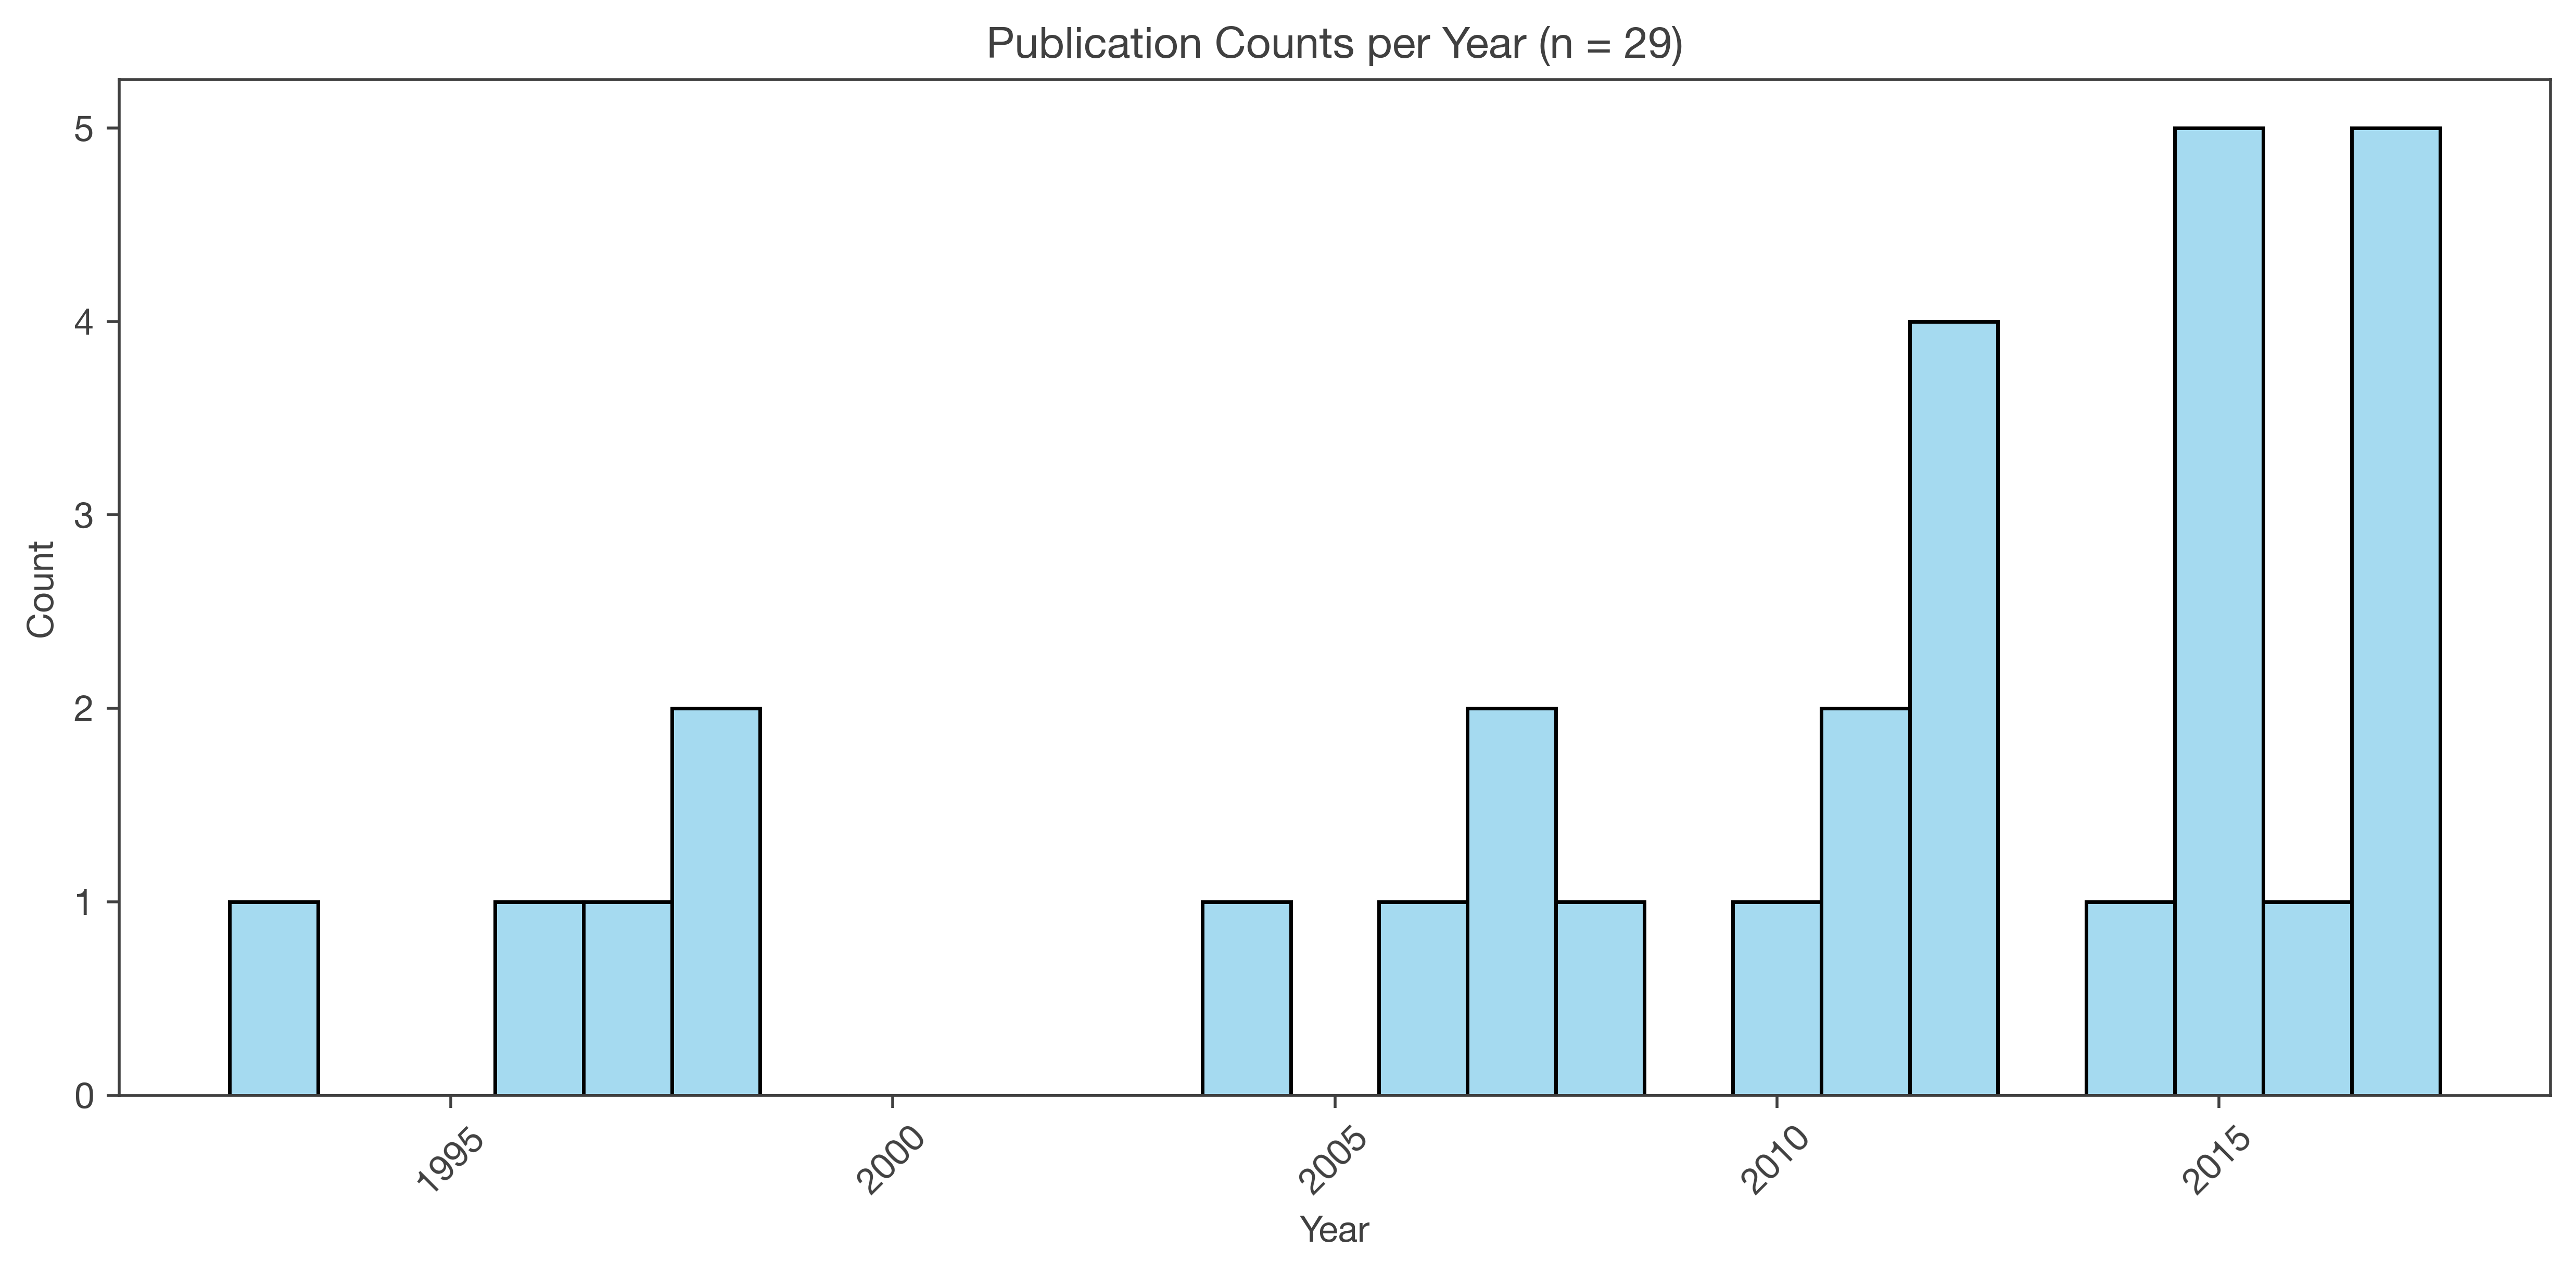

In [1088]:
plot_data = paper_data.copy()
plot_data.head()

# Plot histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    data=plot_data,
    x='Publication_Year',
    bins='auto',  # Let Seaborn automatically determine the bins
    color='skyblue',
    discrete=True
)

# Set y-axis ticks to increment by 1
y_max = ax.get_ylim()[1]
ax.set_yticks(np.arange(0, int(y_max) + 1, 1))

# Titles and labels
ax.set(title=f'Publication Counts per Year (n = {len(paper_data)})')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-ticks if needed for readability
plt.tight_layout()
plot_path = "/".join([figures_path, "publications_per_year_plot.pdf"])
plt.savefig(plot_path)
plt.show()

In [1089]:
population_cols = ['Is_Prisoner', 'Is_Psych_Inpat', 'Is_Displaced_Person', 'Psych_Hx', 'Previous_Ingestions']
# Define motivation columns
motivation_cols = ['Motivation_Intent_To_Harm',
                   'Motivation_Other', 
                   'Motivation_Protest', 
                   'Motivation_Unknown']

# Convert motivation and population columns to binary (1 = Y, 0 = N, NaN = UK or unknown)
for col in population_cols + motivation_cols:
    case_data[col] = case_data[col].map({'Y': 1, 'N': 0, 'UK': np.nan})

    rows = []

for subgroup in population_cols:
    subgroup_df = case_data[case_data[subgroup] == 1]
    total = len(subgroup_df)

    if total == 0:
        continue

    for motivation in motivation_cols:
        count = subgroup_df[motivation].sum(skipna=True)
        percentage = (count / total) * 100 if total > 0 else 0
        rows.append({
            'Subgroup': subgroup.replace('Is_', '').replace('_', ' '),
            'Motivation': motivation.replace('Motivation_', '').replace('_', ' '),
            'Count': int(count),
            'Total': int(total),
            'Percentage': f"{percentage:.1f}\\%"
        })

subgroup_motivation_table = pd.DataFrame(rows)

# Step 1: Convert Percentage column to float (drop LaTeX %)
subgroup_motivation_table['Percentage_Sort'] = (
    subgroup_motivation_table['Percentage']
    .str.replace(r'\\%', '', regex=True)
    .astype(float)
)

# Step 2: Sort by Subgroup and descending Percentage
subgroup_motivation_table = subgroup_motivation_table.sort_values(
    by=['Subgroup', 'Percentage_Sort'], 
    ascending=[True, False]
).drop(columns='Percentage_Sort')


export_path = "/".join([tables_path, 'subgroup_motivation_table.tex'])
subgroup_motivation_table.to_latex(export_path,
                                   index=False)

In [1090]:
outcome_cols = [
    'Outcome_Endoscopy',
    'Outcome_Surgery',
    'Outcome_Conservative',
    'Outcome_Complication',
    'Outcome_Death'
]

outcome_cols = ['Outcome_Endoscopy',
                'Outcome_Surgery',
                'Outcome_Endoscopy_Surgery',
                'Outcome_Conservative',
                'Outcome_Death',	
                'Outcome_Injury_Needing_Intervention',	
                'Outcome_Perforation',	
                'Outcome_Obstruction',	
                'Outcome_Other']

population_cols = ['Is_Prisoner', 'Is_Psych_Inpat', 'Is_Displaced_Person', 'Psych_Hx', 'Previous_Ingestions']
# Define motivation columns
motivation_cols = ['Motivation_Intent_To_Harm',
                   'Motivation_Other', 
                   'Motivation_Protest', 
                   'Motivation_Unknown']

# Convert motivation and population columns to binary (1 = Y, 0 = N, NaN = UK or unknown)
for col in population_cols + motivation_cols:
    case_data[col] = case_data[col].map({'Y': 1, 'N': 0, 'UK': np.nan})

    rows = []

for subgroup in population_cols:
    subgroup_df = case_data[case_data[subgroup] == 1]
    total = len(subgroup_df)

    if total == 0:
        continue

    for motivation in motivation_cols:
        count = subgroup_df[motivation].sum(skipna=True)
        percentage = (count / total) * 100 if total > 0 else 0
        rows.append({
            'Subgroup': subgroup.replace('Is_', '').replace('_', ' '),
            'Motivation': motivation.replace('Motivation_', '').replace('_', ' '),
            'Count': int(count),
            'Total': int(total),
            'Percentage': f"{percentage:.1f}\\%"
        })

subgroup_motivation_table = pd.DataFrame(rows)

# Step 1: Convert Percentage column to float (drop LaTeX %)
subgroup_motivation_table['Percentage_Sort'] = (
    subgroup_motivation_table['Percentage']
    .str.replace(r'\\%', '', regex=True)
    .astype(float)
)

# Step 2: Sort by Subgroup and descending Percentage
subgroup_motivation_table = subgroup_motivation_table.sort_values(
    by=['Subgroup', 'Percentage_Sort'], 
    ascending=[True, False]
).drop(columns='Percentage_Sort')


export_path = "/".join([tables_path, 'subgroup_motivation_table.tex'])
subgroup_motivation_table.to_latex(export_path,
                                   index=False)

KeyError: 'Percentage'

In [ ]:
export_path = "/".join([PROC_DATA_DIR, "data_extraction", "processed_paper_date.csv"])
paper_data.to_csv(export_path)